# 画图

In [2]:
%matplotlib notebook
import imp, time
from collections import Counter, OrderedDict, defaultdict, deque, namedtuple
import matplotlib.pyplot as plt
import numpy as np, sympy as sy
from sklearn.cluster import KMeans
from scipy import constants as const, signal
from scipy.fftpack import fft, hilbert, ifft
from scipy.optimize import curve_fit
from scipy.optimize import least_squares as ls
from sympy import diff, symbols
import pandas as pd
from numba import jit
import qulab.optimize
from qulab import waveform_new, data2imag, measureroutine_wave
from qulab.storage.utils import save

mrw = imp.reload(measureroutine_wave)
op = imp.reload(qulab.optimize)
wn = imp.reload(waveform_new)
di = imp.reload(data2imag)

read = di.read
write = di.write

In [3]:
x = Record.objects(title='S21vsFlux').order_by('-finished_time')[0]
x

Record(title=S21vsFlux, finished_time=2020-08-05 17:05:19.470959, tags=['q1'])

In [4]:
data, ID, comment, tags, name, finishtime = read(title='S21vsFlux_awgoffset',which=0)
np.shape(data[2])

(21, 201, 10)

## 保存qubit工作点

In [355]:
qstate = []
def tuple2dict(q):
    for i in q:
        qstate.append(i.asdict())
    return qstate

bit = [q1,q2,q3,q4,q5,q6,q7,q8,q9,q10]
filepath = save('QubitState','qubitstate',state = tuple2dict(bit),base_path=r'D:\skzhao\file_name\wave')
with open(r'D:\skzhao\file_name\qubit_state_wave.txt', mode='a') as filename:
    filename.write(str(filepath))
    filename.write('\n')
print(filepath)

D:\skzhao\file_name\wave\2020\0922\QubitState\qubitstate_20200922093240.npz


In [321]:
q1.asdict()

{'q_name': 'q1',
 'inst': {'dc': 'dc05',
  'z_awg': 'awg131',
  'z_ch': [1],
  'ex_awg': 'awg133',
  'ex_ch': [2, 6],
  'ex_lo': 'psg_ex1',
  'com': 'com3'},
 'T_bias': [3.364, -0.229, (3.36212491877869, -0.24)],
 'specfunc': sqrt((5.27147983874104*(0.951295210179464*tan(0.934406879424038*x + 0.224257651061769)**2 + 1)**(1/4)*sqrt(Abs(cos(0.934406879424038*x + 0.224257651061769))) - 7.34168389569458)**2 + 0.314857755991714)/2 + 2.63573991937052*(0.951295210179464*tan(0.934406879424038*x + 0.224257651061769)**2 + 1)**(1/4)*sqrt(Abs(cos(0.934406879424038*x + 0.224257651061769))) + 2.83695098455155,
 'bias': 0,
 'zpulse': None,
 'f_lo': array([6.535e+09]),
 'delta': array([50000000.]),
 'f_ex': array([4.5389e+09]),
 'delta_ex': array([1.1e+08]),
 'alpha': 256400000.0,
 'power_ex': 60,
 'power_rabi': 30,
 'pi_len': 23,
 'T1': 23016.178849233776,
 'state': [{'q3': {'offset': 0.0, 'load': 'high Z', 'error': '+0'},
   'q4': {'offset': 0.0, 'load': 'high Z', 'error': '+0'},
   'q8': {'offset':

## 提取qubit工作点

In [325]:
fl = np.loadtxt(r'D:\skzhao\file_name\qubit_state_wave.txt',dtype='str')
f = str(fl[-1])
data = np.load(f,allow_pickle=True)
def dict2tuple(q):
    for i,k in enumerate(q):
        attr = {}
        for j in mrw.qubit().asdict():
            if j in k:
                attr[j] = k[j]
            else:
                attr[j] = None
        globals()[k['q_name']] = mrw.qubit(**attr)

dict2tuple(data['state'])
print(f)

D:\skzhao\file_name\wave\2020\0922\QubitState\qubitstate_20200922092332.npz


# 查看图形

<IPython.core.display.Javascript object>


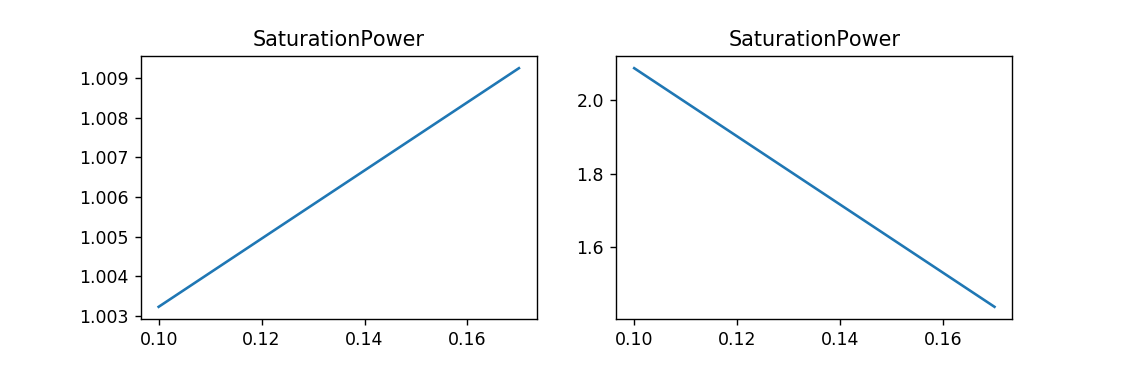

['jpa'] 2020-09-25 17:12:16.504324


In [300]:
value,num,tags,finishtime = write(title='SaturationPower',height=3,which=0,peak=11200)
print(tags,finishtime)

<IPython.core.display.Javascript object>


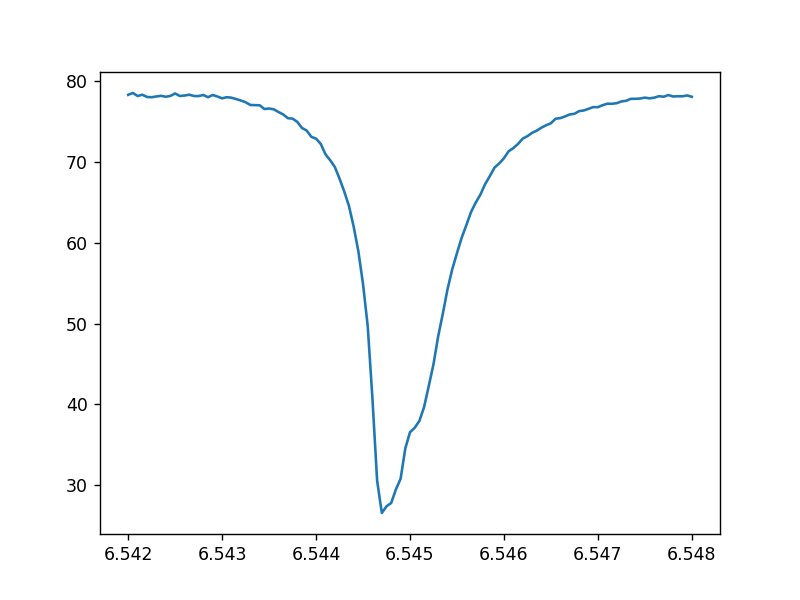

In [32]:
plt.figure()
plt.plot(value[0][1],np.abs(value[0][2][12]))
plt.show()

In [318]:
flux, power, sf = value[0][0], value[0][1], value[0][2]
index = np.argwhere(np.abs(sf)==np.max(np.abs(sf)))[0]
p_op, c_op = power[index[1]], flux[index[0]]
print('current=%f, power=%f'%(c_op,p_op))

current=-2.400000, power=5.700000


<IPython.core.display.Javascript object>


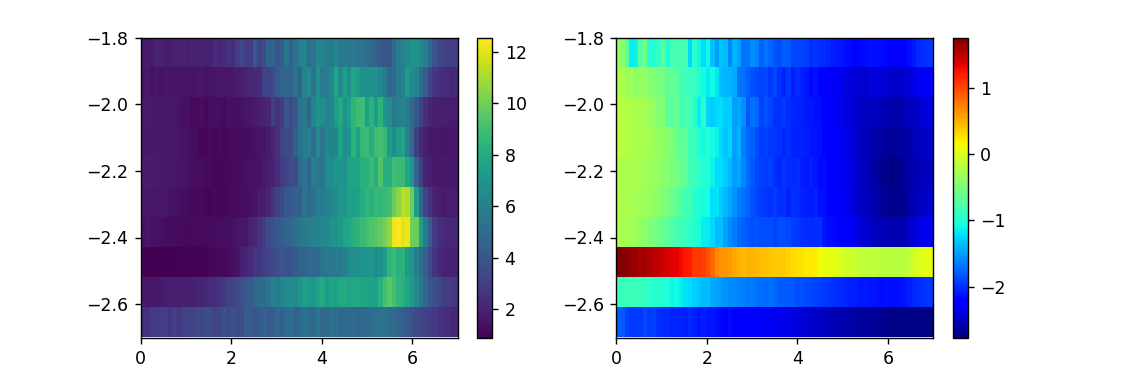

['bluefors_jpa_xue', 'fcenter=6750000000.0'] 2020-09-25 17:23:53.663351


In [317]:
value,num,tags,finishtime = write(title='BiasvsPump',height=3,which=0,peak=1120,phase='phase')
print(tags,finishtime)

# 拟合Q值

In [137]:
data, ID, comment, tags, name, finishtime = read(title='S21',which=0)
np.shape(data[1])

(201, 1)

In [ ]:
from qulab import getplotlydat
gpd = imp.reload(getplotlydat)
path = r'D:\step1\14Q1changePwr.html'
x, y, z = gpd.gethtmldata(path,flag='x'), gpd.gethtmldata(path,flag='y'), gpd.gethtmldata(path,flag='z')


In [180]:
data = np.load(r'C:\Users\23967\Desktop\tozsk\201100Scanfr.npz')

In [39]:
f, s21 = data['ffrr'], data['dataGhz']
f0, Qi, Qe, QL, phi, f, s = op.Cavity_fit().fitCavity(f,s21)
plt.figure(figsize=(5,4))
plt.plot(f,np.abs(s))
plt.title(f'Low Power_wangzhan, Qi={int(Qi)},Qe={int(Qe)},QL={int(QL)}')
plt.plot(f,1/np.abs(op.Cavity_fit().invS21(f, f0, Qi, Qe, phi)))
plt.show()

TypeError: tuple indices must be integers or slices, not str

<IPython.core.display.Javascript object>


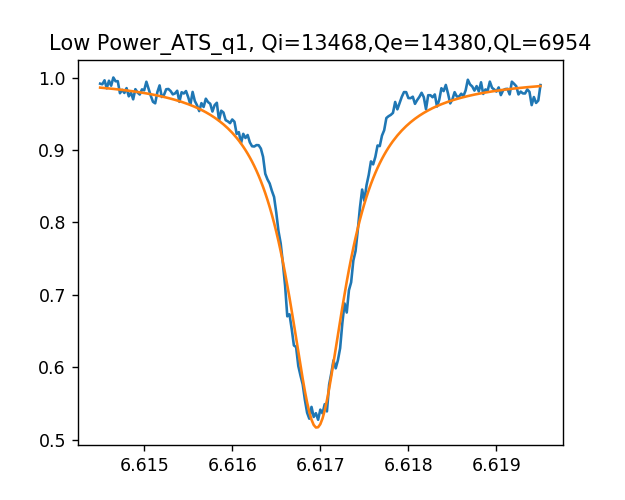

In [138]:
f, s21 = data[0][:,0]/1e9, data[1][:,0]
f0, Qi, Qe, QL, phi, f, s = op.Cavity_fit().fitCavity(f,s21)
plt.figure(figsize=(5,4))
plt.plot(f,np.abs(s))
plt.title(f'Low Power_ATS_q1, Qi={int(Qi)},Qe={int(Qe)},QL={int(QL)}')
plt.plot(f,1/np.abs(op.Cavity_fit().invS21(f, f0, Qi, Qe, phi)))
plt.show()

In [333]:
tag = ''
for i in tags:
    tag += i
save('S21',tag,base_path=r'D:\skzhao\data\ffsu\Nb10bits_2_cuqiang',row=data[0],col=data[1])

WindowsPath('D:/skzhao/data/ffsu/Nb10bits_2_cuqiang/2020/0824/S21/q6_20200824171301.npz')

In [43]:
x, y = value[0][0], value[0][1]
fig = plt.gcf()
ax = plt.getp(fig,'axes')
w,yt,amp = op.RowToRipe().fourier(x,np.abs(y))
ax[1].plot(yt[yt!=0],np.abs(amp[yt!=0]))
ax[1].set_title('$W=%.3fMHz$'%(w*1000))
plt.show()

# 移动偏置看谱

<IPython.core.display.Javascript object>


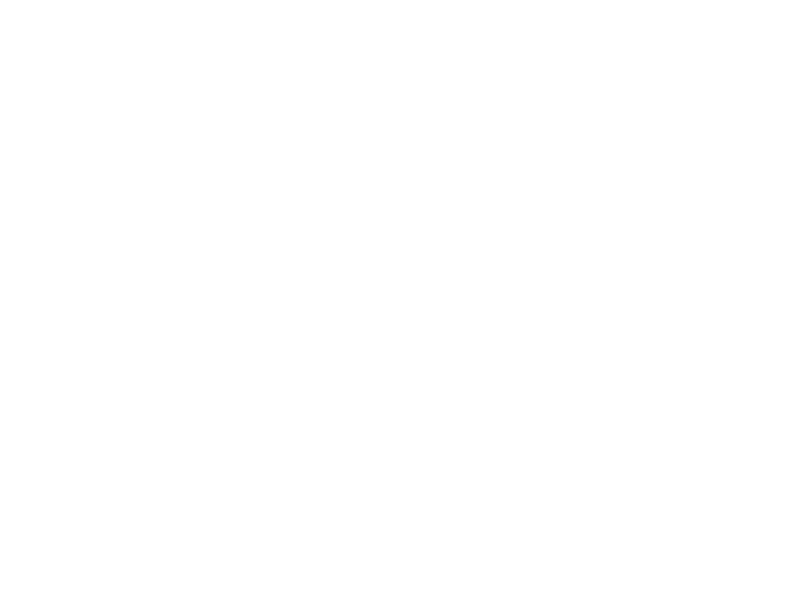

In [25]:
fig = plt.figure(num='specvsbias')

In [179]:
5.189-5.063

0.12600000000000033

In [26]:
data, ID, comment, tags, name, finishtime = read(title='singlespec',which=8)
print(finishtime)

2020-09-25 04:21:26.381908


In [27]:
tags

['q5']

In [23]:
plt.figure(num='specvsbias')
plt.plot(data[0],np.abs(data[1]),label='JPA OFF',alpha=0.5)
plt.legend(loc='best')
plt.show()

In [28]:
def test(x,**para):
    print(1)
test(1)

SyntaxError: invalid syntax (<ipython-input-28-2d428fa9a5ee>, line 1)

In [78]:
tag = ''
for i in tags:
    tag += i
save('singlespec',tag,base_path=r'D:\skzhao\data\ffsu\Nb10bits_2_cuqiang',row=data[0],col=data[1])

WindowsPath('D:/skzhao/data/ffsu/Nb10bits_2_cuqiang/2020/0831/singlespec/Nbq6_20200831094455.npz')

# 读出点

In [260]:
data, ID, comment, tags, name, finishtime = read(title='readOp',which=0)
np.shape(data[1])

(2, 121, 2)

<IPython.core.display.Javascript object>


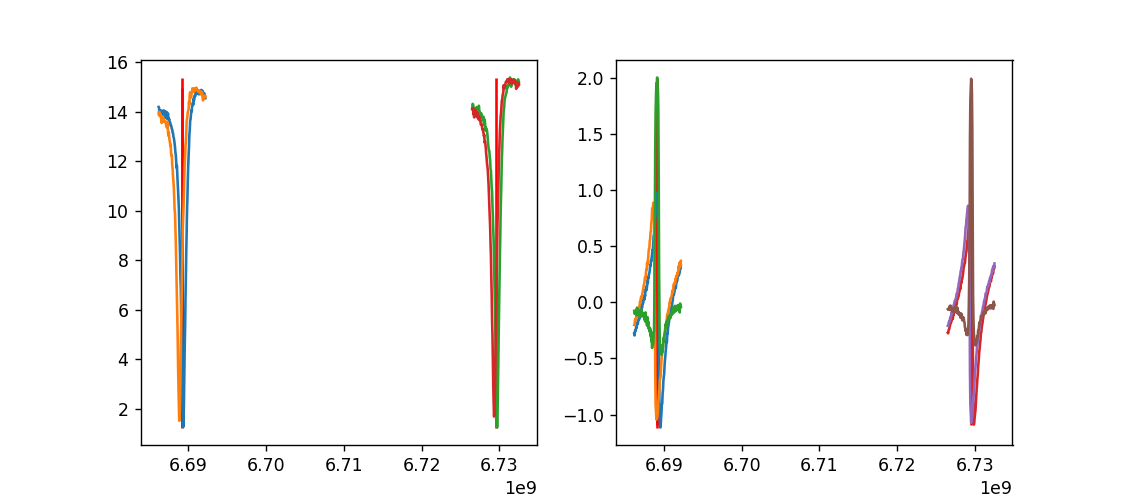

In [261]:
f_lo = []
f_op, s_op = data[1], data[2]
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,4))
for i in range(np.shape(data[1])[2]):
    f, s_off, s_on = f_op[0,:,i], s_op[0,:,i], s_op[1,:,i]
    f_lo1 = (f[np.argmin(np.abs(s_off))] + f[np.argmin(np.abs(s_on))])/2
    x_off, y_off = op.RowToRipe().deductPhase(f,s_off)
    x_on, y_on = op.RowToRipe().deductPhase(f,s_on)
    anglediff = (np.angle(y_off[0])-np.angle(y_on[0]))
    index = np.abs(anglediff).argmax(axis=0)
    #index = np.abs(s_off).argmin(axis=0)
    f_lo.append(f[index] if np.abs(f[index]-f_lo1)<0.1e6 else f_lo1)
    axes[0].plot(f_op[:,:,i].T,np.abs(s_op[:,:,i].T))
    axes[0].vlines(f_lo,np.max(np.abs(s_op[:,:,i].T)),np.min(np.abs(s_op[:,:,i].T)),'r')
    axes[1].plot(x_off,np.angle(y_off[0]))
    axes[1].plot(x_on,np.angle(y_on[0]))
    axes[1].plot(x_off,anglediff)
    axes[1].vlines(f_lo,np.max(anglediff),np.min(np.angle(y_off[0])),'r')
plt.show()

In [125]:
6.54458-6.5444

0.00017999999999940286

In [368]:
tag = ''
for i in tags:
    tag += i
save('readOp',tag,base_path=r'D:\skzhao\data\ffsu\Nb10bits_2_cuqiang',row=data[1],col=data[1])

WindowsPath('D:/skzhao/data/ffsu/Nb10bits_2_cuqiang/2020/0824/readOp/q6_20200824172750.npz')

# Zpulse_offset

<IPython.core.display.Javascript object>


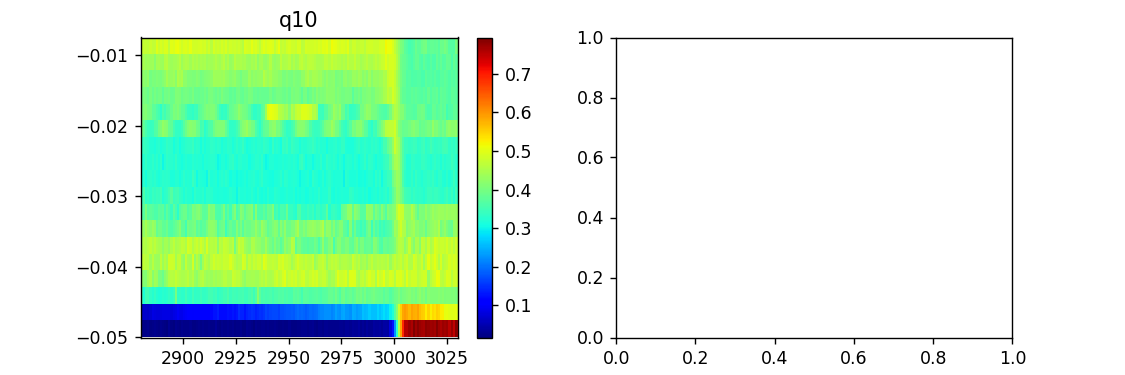

['q10'] 2020-09-24 19:09:25.768787


In [228]:
value,num,tags,finished_time = write(title='zPulse_pop',height=3,which=0,peak=1000)
print(tags,finished_time)

In [76]:
data, ID, comment, tags, name, finishtime = read(title='zPulse_pop',which=0)
np.shape(data[1])

(11, 111, 1)

<IPython.core.display.Javascript object>


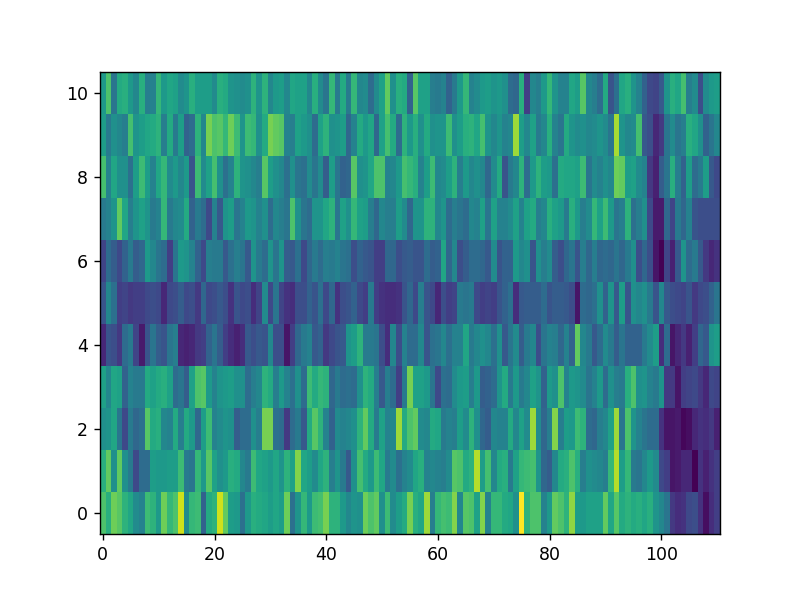

In [83]:
x,y,z=data[0][:,0],data[1][0,:,0],data[2][:,:,0]
plt.figure()
plt.imshow(z,origin='lower',aspect='auto')

<IPython.core.display.Javascript object>


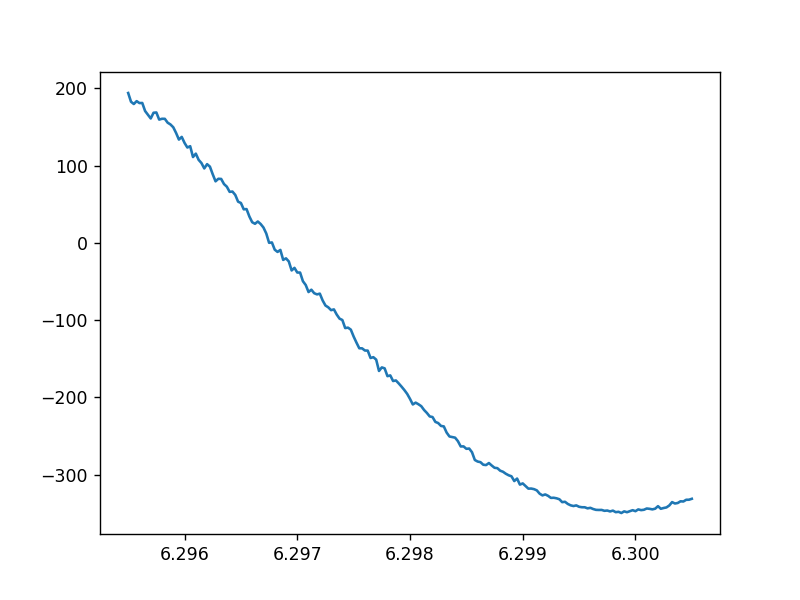

In [238]:
plt.figure()
plt.plot(value[0][1],value[0][2][2])
plt.show()

In [1577]:
0.025/0.15*101

16.833333333333336

In [15]:
v,t,s = value[0][0][:],value[0][1],value[0][2][:,:]
v,f = op.RowToRipe().profile(v,t,s,peak=15,axis=0)
fig = plt.gcf()
ax = plt.getp(fig,'axes')
ax[0].plot(f,v,'r-o')
plt.show()

In [17]:
f_new, v_new = np.abs(f-np.max(f)), v[::-1]

<IPython.core.display.Javascript object>


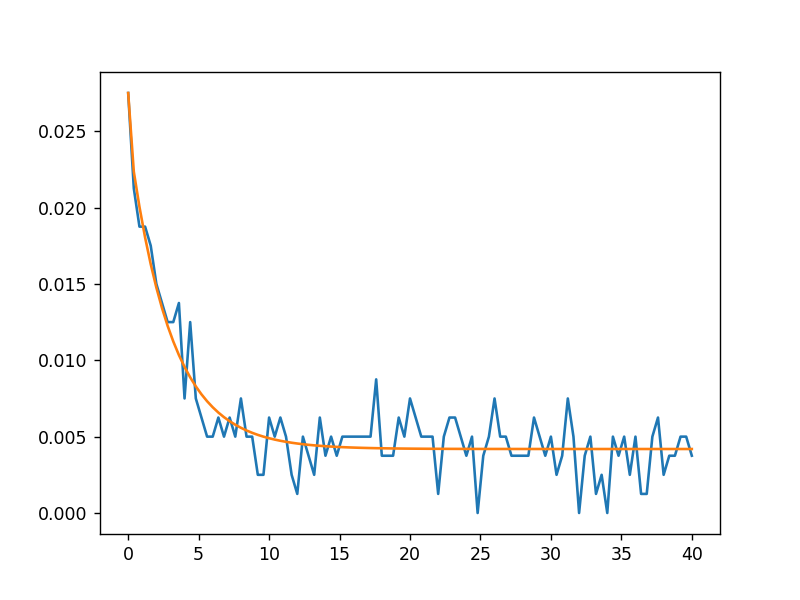

In [18]:
plt.figure()
plt.plot((f_new[:]-np.min(f_new[:])),v[:])
plt.show()

In [19]:
x,y=(f_new[:]-np.min(f_new[:])),v[:]
a, b, c, d, e = op.TwoExp_Fit().fitTwoexp(x,y)
z = a*np.exp(b*x) + c*np.exp(d*x) + e 
fig = plt.gcf()
ax = plt.getp(fig,'axes')
ax[0].plot(x,z)
plt.show()

(0.02181945161130762, -0.3556120421284931, 0.004363890322261524, -0.07112240842569863, 0.0)


d:\qulab\qulab\optimize.py:423: RuntimeWarning: overflow encountered in exp
  return np.sum((a*np.exp(b*x) + c*np.exp(d*x) + e - y)**2)
d:\qulab\qulab\optimize.py:423: RuntimeWarning: overflow encountered in square
  return np.sum((a*np.exp(b*x) + c*np.exp(d*x) + e - y)**2)


In [21]:
1/d

-2.956788087415525

<IPython.core.display.Javascript object>


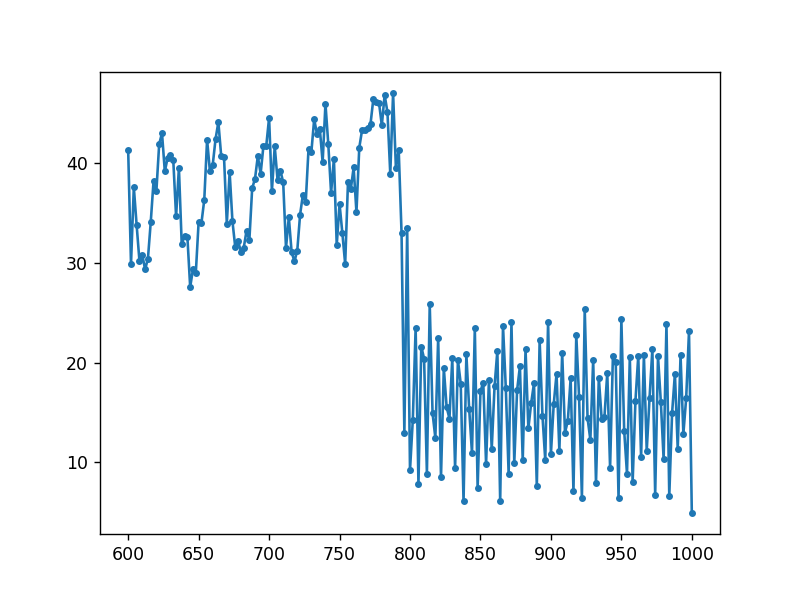

In [996]:
x,y = value[0][1],np.abs(value[0][2][1])
# a,b,c,d,e,f = op.Lorentz_Fit().fitLorentz(x,y)
# z = a/(1.0+c*(x-b)**2)+d
# fig = plt.gcf()
# ax = plt.getp(fig,'axes')
plt.figure()
plt.plot(x,y,'-o',markersize=3)
# plt.plot(x,y,'.')
plt.show()

# RamseyZpulse

In [24]:
data, ID, comment, tags, name, finishtime = read(title='ramseyZpulse',which=2)
t_rz, poplist_rz = data[0][:,0], data[1][:]
print(tags,finishtime)

['q6'] 2020-06-12 14:32:13.036013


In [56]:
def test(theta):
    j = 0
    theta_new = []
    theta_new.append(theta[0])
    for i,j in enumerate(theta[1:],start=1):
        while 1:
            if theta_new[i-1]>j+0.8:
                j += np.pi
            else:
                break
        theta_new.append(j)
    return np.array(theta_new)

<IPython.core.display.Javascript object>


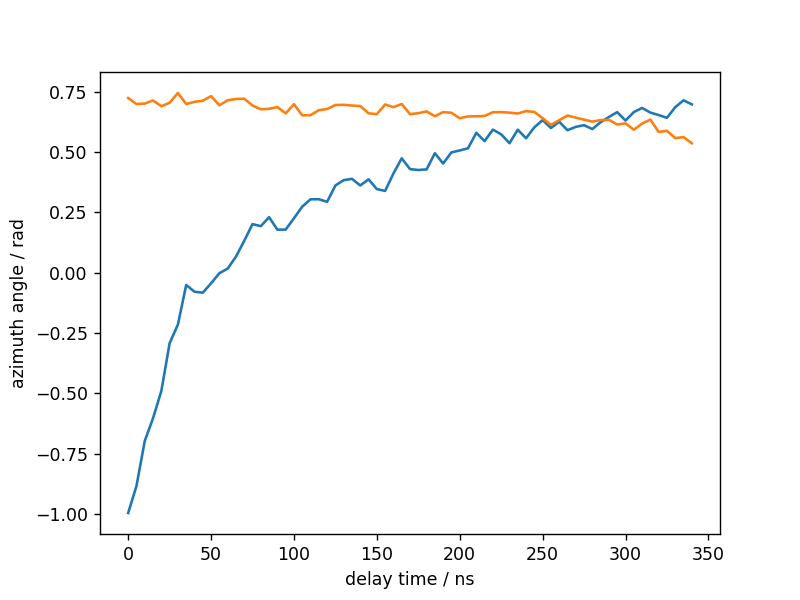

In [23]:
coordinate = [[1-2*j[i] for i in range(2)] for j in poplist_rz]
theta = np.array([np.arctan(i[1]/i[0]) for i in coordinate])
# theta = np.array([theta[i] if i<47 else theta[i]-np.pi for i in range(len(theta))])
# theta = test(theta)
plt.figure()
plt.plot(t_rz,theta)
plt.xlabel('delay time / ns')
plt.ylabel('azimuth angle / rad')
plt.show()

In [25]:
coordinate = [[1-2*j[i] for i in range(2)] for j in poplist_rz]
theta = np.array([np.arctan(i[1]/i[0]) for i in coordinate])
fig = plt.gcf()
ax = plt.getp(fig,'axes')
ax[0].plot(t_rz,theta)
plt.show()

In [1017]:
j = 0
theta_new = []
theta_new.append(theta[0])
for i,j in enumerate(theta[1:],start=1):
    if theta_new[i-1]-j>np.pi/2:
        theta_new.append(j+np.pi/2)
    elif theta_new[i-1]-j<-np.pi/2:
        theta_new.append(j-np.pi/2)
    else:
        theta_new.append(j)

<IPython.core.display.Javascript object>


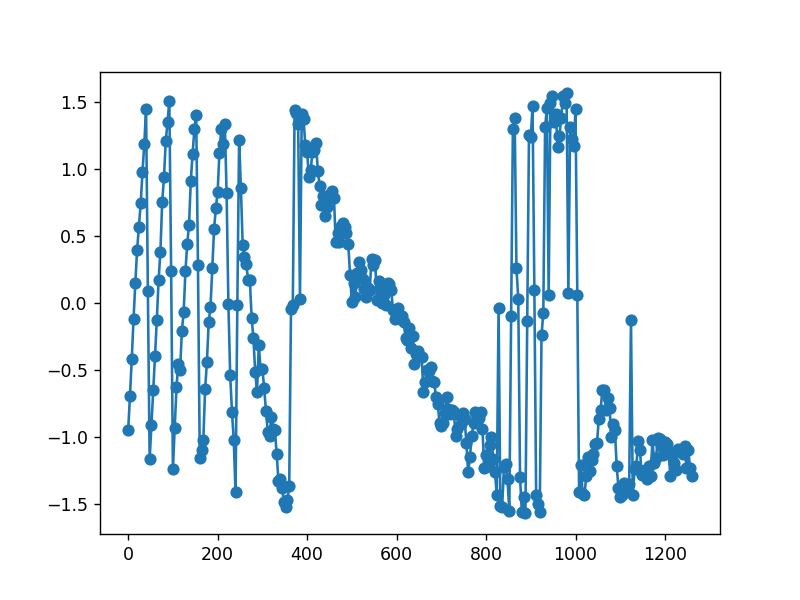

In [1019]:
plt.figure()
plt.plot(t_rz,theta_new,'-o')
plt.show()

In [1016]:
np.shape(theta_new)

(335,)

In [13]:
a, b, c, d, e = op.TwoExp_Fit().fitTwoexp(t_rz,theta)
z = a*np.exp(b*t_rz) + c*np.exp(d*t_rz) + e
fig = plt.gcf()
ax = plt.getp(fig,'axes')
ax[0].plot(t_rz,z)
plt.show()

(-1.2305019961822254, -0.019269795441661734, -0.2461003992364451, -0.003853959088332347, 0.7487539570727105)


d:\qulab\qulab\optimize.py:423: RuntimeWarning: overflow encountered in square
  return np.sum((a*np.exp(b*x) + c*np.exp(d*x) + e - y)**2)
d:\qulab\qulab\optimize.py:423: RuntimeWarning: overflow encountered in exp
  return np.sum((a*np.exp(b*x) + c*np.exp(d*x) + e - y)**2)


In [1782]:
print(1/b,1/d)

-35.332317708042 -330.1660583068357


# RB

['q6', 'reference', 'nodrag'] 2020-08-27 20:16:44.037242


<IPython.core.display.Javascript object>


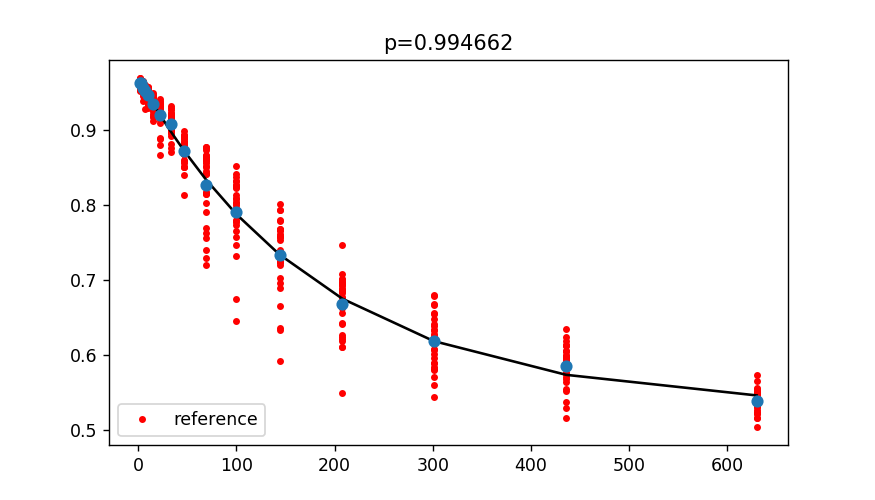

In [173]:
data, ID, comment, tags, name, finishtime = read(title='RB_waveform',which=0)
print(tags,finishtime)
n, pop = data[0][:,0],data[1]
x = np.meshgrid(range(np.shape(pop)[1]),n)[1]
plt.figure(figsize=(7,4))
x = np.meshgrid(range(np.shape(pop)[1]),n)[1]
plt.plot(x.flatten(),pop.flatten(),'r.',label=tags[1])
plt.legend(loc='lower left')
x, y = n, np.mean(pop,axis=1)
A,B,p = op.RB_Fit().fitRB(x,y)
z = A*p**x+B
plt.plot(x,z,'k')
plt.plot(x,y,'o')
plt.title('p=%f'%p)
plt.show()

1593098769.7224395

In [267]:
Pref, Pgate, d = 0.996725, 0.996521, 2**(1)
Rgate = (1-Pgate/Pref)*(1-1/d)
Rgate

0.00010233514760843443

In [268]:
1-0.00010233514760843443

0.9998976648523916

# pi脉冲优化

<IPython.core.display.Javascript object>


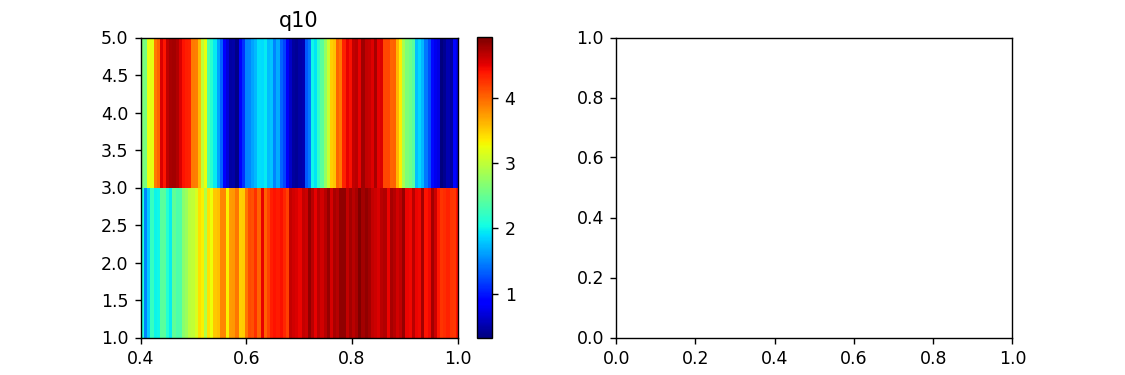

['q10'] 2020-09-24 14:36:08.020805


In [209]:
value,num,tags,finishtime = write(title='pipulseOpt',height=3,which=0,peak=1120)
print(tags,finishtime)

In [185]:
x, y, s = value[0][0],value[0][1], np.abs(value[0][2])
index = y[np.argmax(np.abs(s),axis=1)[0]]
y = np.array([op.RowToRipe().firstMax(y,z,num=0.638,peakpercent=0.9,insitu=True) for z in s])
fig = plt.gcf()
ax = plt.getp(fig,'axes')
ax[0].set_xlabel('time / ns')
ax[0].set_yticks(x)
ax[0].set_ylabel('number of pi pulse')
ax[0].scatter(y[1:-1],x[1:-1],marker='.',c='',edgecolors='m')
ax[0].vlines(np.mean(y),np.max(x),np.min(x))
ax[0].set_title('pi=%.3fns'%np.mean(y))
plt.show()

<IPython.core.display.Javascript object>


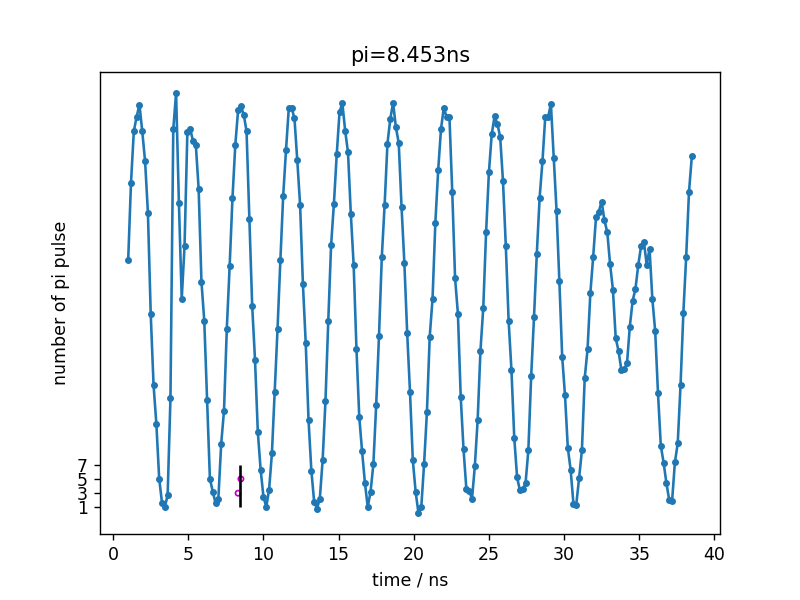

In [383]:
x,y = value[0][1],np.abs(value[0][2][2])
# a,b,c,d,e,f = op.Lorentz_Fit().fitLorentz(x,y)
# z = a/(1.0+c*(x-b)**2)+d
# fig = plt.gcf()
# ax = plt.getp(fig,'axes')
plt.figure()
plt.plot(x,y,'-o',markersize=3)
# plt.plot(x,y,'.')
plt.show()

# AllXY drag

['q6'] 2020-08-27 16:36:35.867977


<IPython.core.display.Javascript object>


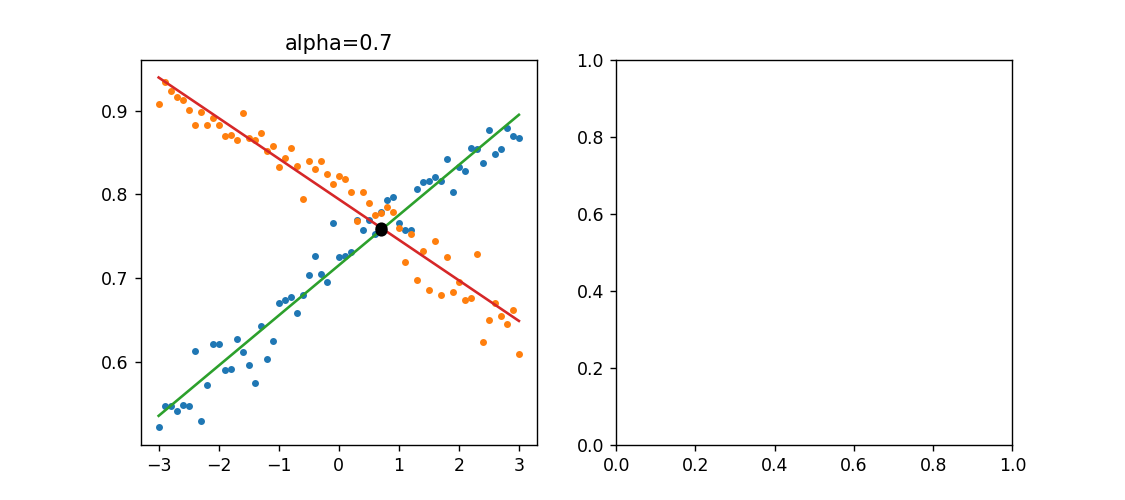

In [94]:
data, ID, comment, tags, name, finishtime = read(title='AllXYdragdetune',which=0)
print(tags,finishtime)
fall, sall = data[0],data[1]
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,4))
l = np.shape(fall)[0]//2
f1, f2, s1, s2 = fall[:l,0], fall[l:,0], np.abs(sall[:l,0]), np.abs(sall[l:,0])
z1 = np.poly1d(np.polyfit(f1,s1,1))(f1)
z2 = np.poly1d(np.polyfit(f2,s2,1))(f2)
index = np.argmin(np.abs(z1-z2))
axes[0].plot(np.array([f1,f2]).T,np.array([s1,s2]).T,'.')
axes[0].plot(np.array([f1,f2]).T,np.array([z1,z2]).T)
# axes[0].plot(fall[l:,:],np.abs(sall[l:,:]))
axes[0].plot([f1[index],f2[index]],[z1[index],z2[index]],'ko')
axes[0].set_title(f'alpha={round(f1[index],3)}')
plt.show()

# HD

In [396]:
data, ID, comment, tags, name, finishtime = read(title='dragcoefHD',which=5)
print(tags,finishtime)

['q3'] 2020-06-25 15:55:51.476244


<IPython.core.display.Javascript object>


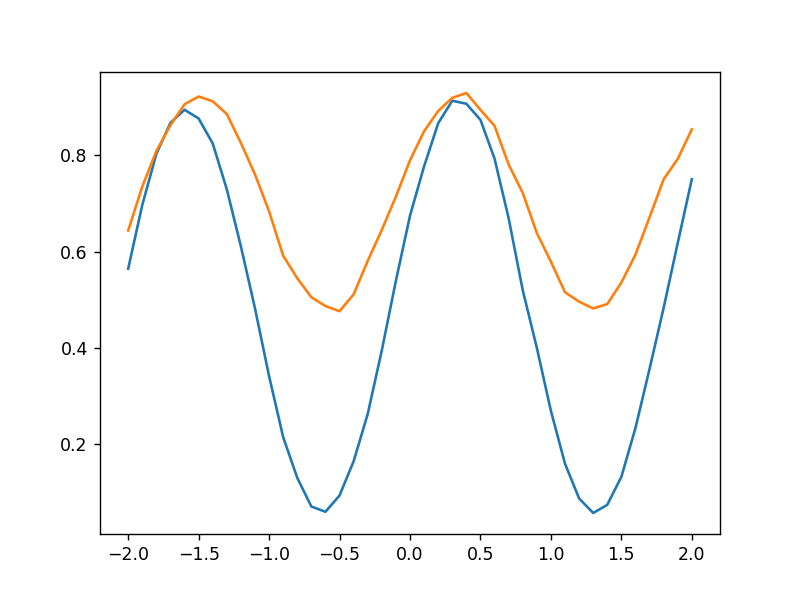

In [395]:
x, y = data[0][:,0], data[1][:,0]
plt.figure()
plt.plot(x,y)
plt.show()

In [397]:
x, y = data[0][:,0], data[1][:,0]
fig = plt.gcf()
ax = plt.getp(fig,'axes')
ax[0].plot(x,y)
plt.show()

# 临界线

In [271]:
data, ID, comment, tags, name, finishtime = read(title='threshHold',which=0)
print(tags,finishtime)

['q8'] 2020-09-25 13:49:21.463350


<IPython.core.display.Javascript object>


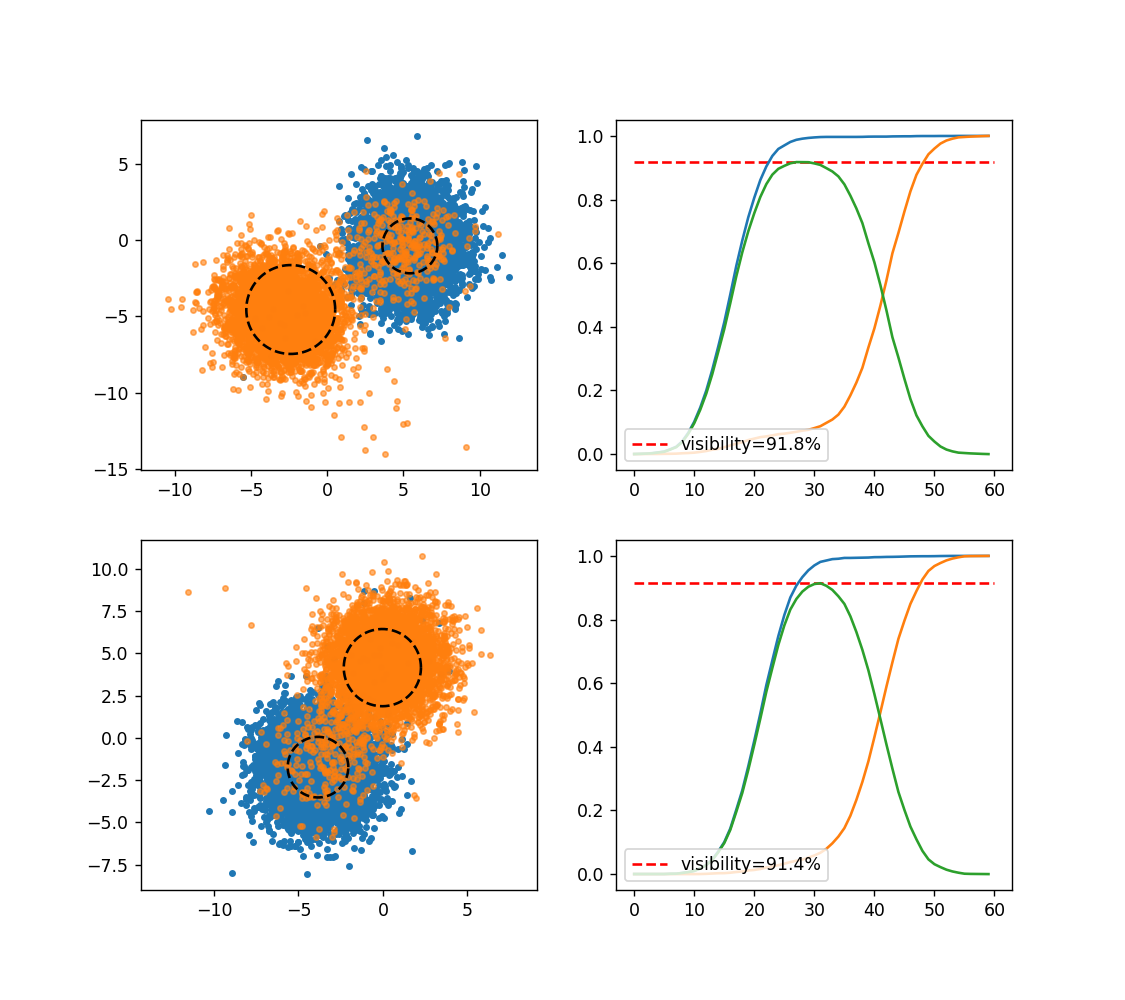

In [272]:
s_st = data[1]
n = np.shape(s_st)[2]
num = n

fig, axes = plt.subplots(ncols=2,nrows=num,figsize=(9,4*num))
for i in range(n):
    s_off, s_on = s_st[0,:,i], s_st[1,:,i]
    res = await mrw.visibility(1,s_off,s_on)
    ax0 = axes[i][0] if num>1 else axes[i]
    ax0.plot(np.real(s_off),np.imag(s_off),'.')
    ax0.plot(np.real(s_on),np.imag(s_on),'.',alpha=0.6)
    ax0.plot(*(res[0][3]),'k--')
    ax0.plot(*(res[0][4]),'k--')
    ax0.axis('equal')
    ax1 = axes[i][1] if num>1 else axes[i+1]
    for j in res[0][:3]:
        ax1.plot(j)
    maxdata = np.max(res[0][2])
    ax1.hlines(maxdata,0,60,'r','--',label=f'visibility={round(maxdata*100,1)}%')
    ax1.legend(loc='lower left')
    ax.vlines([0],10,-100)
    ax.hlines([0],-10,100)

plt.show()

In [407]:
tag = ''
for i in tags:
    tag += i
save('threshHold',tag,base_path=r'D:\skzhao\data\ffsu\Nb10bits_2_cuqiang',row=data[1])

WindowsPath('D:/skzhao/data/ffsu/Nb10bits_2_cuqiang/2020/0824/threshHold/q6_20200824200935.npz')

# Crosstalk矩阵

In [132]:
z_crosstalk = np.ones((10,10))

<IPython.core.display.Javascript object>


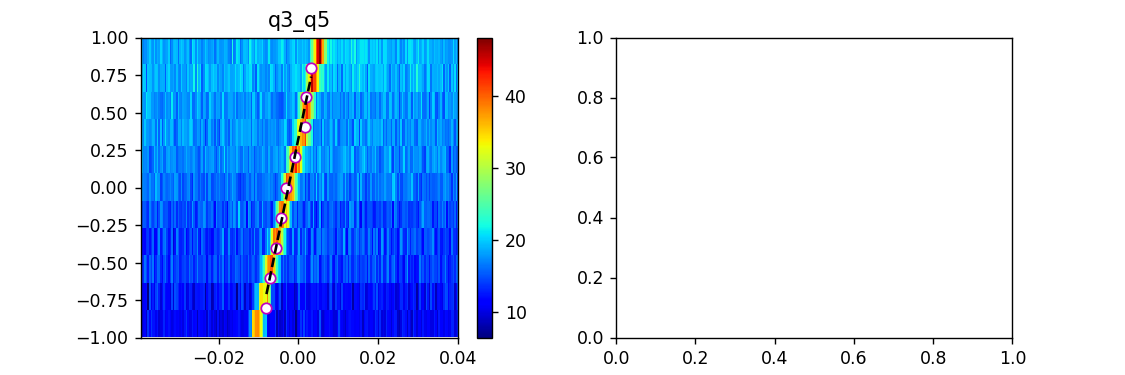

['q3_q5'] 2020-04-01 18:30:31.148601


In [130]:
value,num,tags,finishtime = write(height=3,title='crosstalkSpec',which=6,peak=1120)
print(tags,finishtime)

In [ ]:
'q6-q3','q4_q7','q4-q6','q4-q5'

In [133]:
target = 1
v, f, s = value[target-1][0], value[target-1][1], value[target-1][2]
peak = (np.max(np.abs(s))+np.min(np.abs(s))) / 3
v, f, res = op.Crosstalk_Fit(peak=peak).fitCrosstalk(v,f,s,classify=False)
z = res[0]*f + res[1]
row, col = eval(tags[0][1])-1, eval(tags[0][-1])-1
z_crosstalk[row,col] = -1/res[0]
fig = plt.gcf()
ax = plt.getp(fig,'axes')
ax[target-1].scatter(f[1:-1],v[1:-1],marker='o',c='w',edgecolors='m')
ax[target-1].plot(f[1:-1],z[1:-1],'k--')
plt.show()

In [174]:
qname = ['q2','q3','q4','q5']
pd.DataFrame(z_crosstalk.T[1:5,1:5],columns=qname,index=qname)

q2        q3        q4        q5
q2  1.000000 -0.011626 -0.003775 -0.007910
q3  0.019994  1.000000 -0.017023 -0.007725
q4  0.020027  0.021286  1.000000 -0.022010
q5  0.016164  0.014805  0.013947  1.000000

In [116]:
old = np.array([[ 1.        , -0.00614072,  0.00237171,  0.00339285,  0.01229189],
       [ 0.01965284,  1.        , -0.01015246, -0.00295805, -0.00609832],
       [ 0.01144612,  0.02177006,  1.        , -0.01671896, -0.00728347],
       [ 0.01140976,  0.02193547,  0.02581161,  1.        , -0.01872843],
       [ 0.00925843,  0.01711204,  0.01496927,  0.01558848,  1.        ]])

In [188]:
qname = ['q2','q3','q4','q5']
pd.DataFrame(old[1:5,1:5],columns=qname,index=qname)

q2        q3        q4        q5
q2  1.000000 -0.010152 -0.002958 -0.006098
q3  0.021770  1.000000 -0.016719 -0.007283
q4  0.021935  0.025812  1.000000 -0.018728
q5  0.017112  0.014969  0.015588  1.000000

In [189]:
z = z_crosstalk.T[1:5,1:5] - old[1:5,1:5]
qname = ['q2','q3','q4','q5']
pd.DataFrame(z,columns=qname,index=qname)

q2        q3        q4        q5
q2  0.000000 -0.001474 -0.000817 -0.001812
q3 -0.001776  0.000000 -0.000304 -0.000442
q4 -0.001909 -0.004526  0.000000 -0.003282
q5 -0.000948 -0.000164 -0.001641  0.000000

In [176]:
save('crosstalk_cali','xue_crosstalk_q2_5',mat=z_crosstalk.T)

WindowsPath('D:/QuLabData/2020/0401/crosstalk_cali/xue_crosstalk_q2_5_20200401211425.npz')

# 拟合二维谱

In [199]:
specfunc = {}
x = sy.Symbol('x',real=True)

<IPython.core.display.Javascript object>


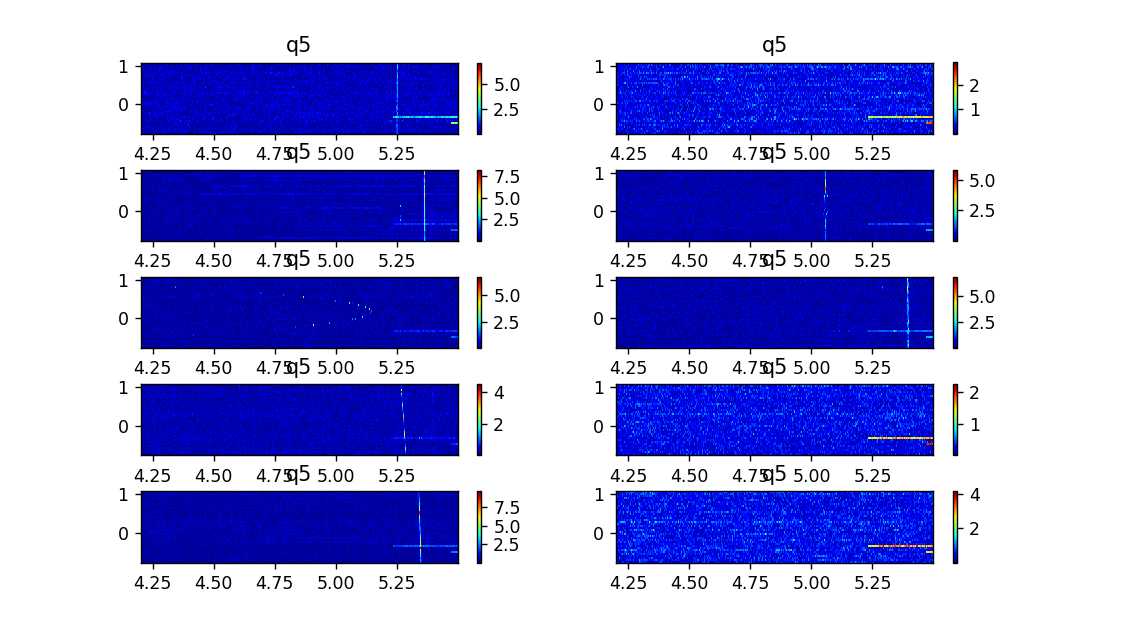

['q5'] 2020-09-23 09:51:17.338087


In [246]:
value,num,tags,finishtime = write(height=1,title='spec2d',which=3,peak=300)
print(tags,finishtime)

In [203]:
target = eval(tags[0][1:])
# target = 1
v, f, s = value[target-1][0][:], value[target-1][1], value[target-1][2][:,:]
# s = s[1:,:]
peak = (np.max(np.abs(s))+np.min(np.abs(s))) / 2
# f,v,A, C, W, phi = op.Spec2d_Fit(peak=peak).fitSpec2d(v,f,s,classify=False)
f, v, voffset, vperiod, ejs, ec, d = op.Spec2d_Fit(peak=peak).fitSpec2d(v,f,np.abs(s),classify=False)
v1 = np.linspace(min(v),max(v),1001)
# z = np.sqrt(A*np.abs(np.cos(W*v1+phi))) + C
tmp = np.pi*(v1-voffset)/vperiod
z = np.sqrt(8*ejs*ec*np.abs(np.cos(tmp))*np.sqrt(1+d**2*np.tan(tmp)**2))-ec
tmp_s = np.pi*(x-voffset)/vperiod
y = sy.sqrt(8*ejs*ec*sy.Abs(sy.cos(tmp_s))*sy.sqrt(1+d**2*sy.tan(tmp_s)**2))-ec
specfunc[tags[0]] = y
print(specfunc)
fig = plt.gcf()
ax = plt.getp(fig,'axes')
ax[target-1].scatter(f,v,marker='.',c='',edgecolors='m')
ax[target-1].plot(z,v1,'y--')
ax[target-1].vlines(np.max(z),np.max(v),np.min(v),'w',label=f'w_max={round(np.max(z),3)}GHz')
ax[target-1].legend(loc='best',fontsize='xx-small')
plt.show()

[-0.00555, 10.024911406838674, 19.551030625002788, 0.2, 0]
{'q7': 5.72240288348088*(0.738239880073661*tan(3.15265444578213*x - 10.0485924791455)**2 + 1)**(1/4)*sqrt(Abs(cos(3.15265444578213*x - 10.0485924791455))) - 0.388134267281972, 'q6': 5.48249320797581*(3.77255843383276e-7*tan(1.07682514609523*x + 0.0273095648223562)**2 + 1)**(1/4)*sqrt(Abs(cos(1.07682514609523*x + 0.0273095648223562))) - 0.114402595774065}


In [150]:
help(plt.legend)

Help on function legend in module matplotlib.pyplot:

legend(*args, **kwargs)
    Place a legend on the axes.
    
    Call signatures::
    
        legend()
        legend(labels)
        legend(handles, labels)
    
    The call signatures correspond to three different ways how to use
    this method.
    
    **1. Automatic detection of elements to be shown in the legend**
    
    The elements to be added to the legend are automatically determined,
    when you do not pass in any extra arguments.
    
    In this case, the labels are taken from the artist. You can specify
    them either at artist creation or by calling the
    :meth:`~.Artist.set_label` method on the artist::
    
        line, = ax.plot([1, 2, 3], label='Inline label')
        ax.legend()
    
    or::
    
        line, = ax.plot([1, 2, 3])
        line.set_label('Label via method')
        ax.legend()
    
    Specific lines can be excluded from the automatic legend element
    selection by defining a label st

<IPython.core.display.Javascript object>


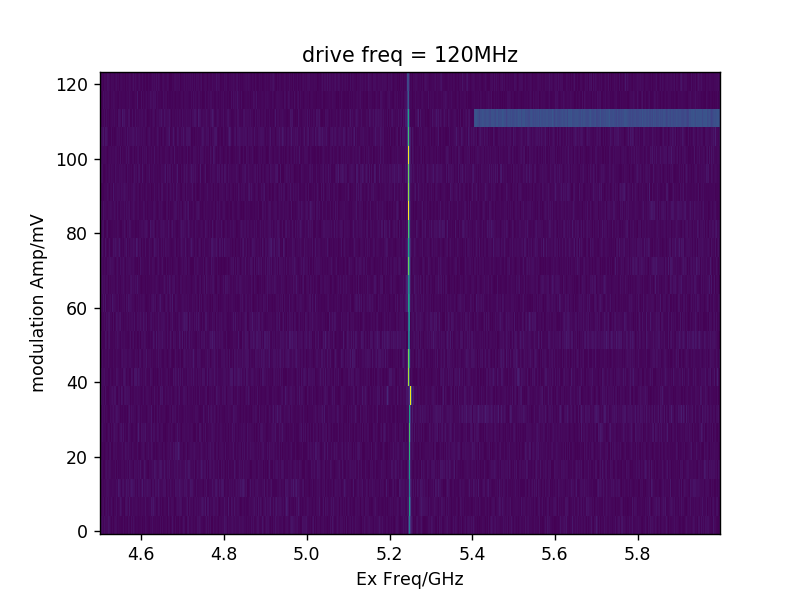

Text(0.5, 1.0, 'drive freq = 120MHz')

In [394]:
z = np.abs(value[0][2][:36,:])
s = [i if (i.mean()>10) else (i+8) for i in z]
extent = [min(value[0][1]),max(value[0][1]),min(value[0][0][:36]),250*max(value[0][0][:36])]
plt.figure()
plt.imshow(s,aspect='auto',origin='lower',extent=extent)
plt.xlabel('Ex Freq/GHz')
plt.ylabel('modulation Amp/mV')
plt.title('drive freq = 120MHz')

<IPython.core.display.Javascript object>


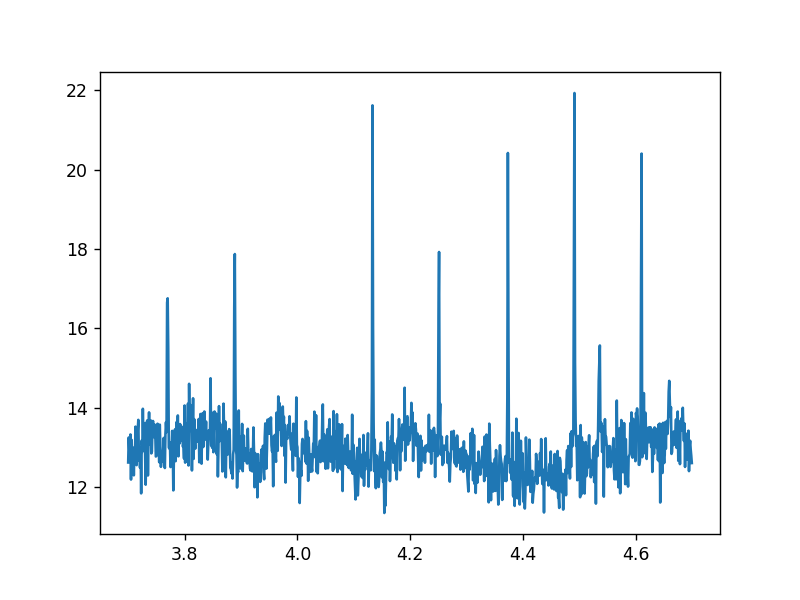

In [50]:
plt.figure()
plt.plot(value[0][1],np.abs(value[0][2][20]))
plt.show()

In [75]:
voffset, vperiod, ejs, ec, d

(1.7251075185533487,
 1.181540460913857,
 4.485069785387775,
 0.3642262409302227,
 1.451488367334632)

<IPython.core.display.Javascript object>


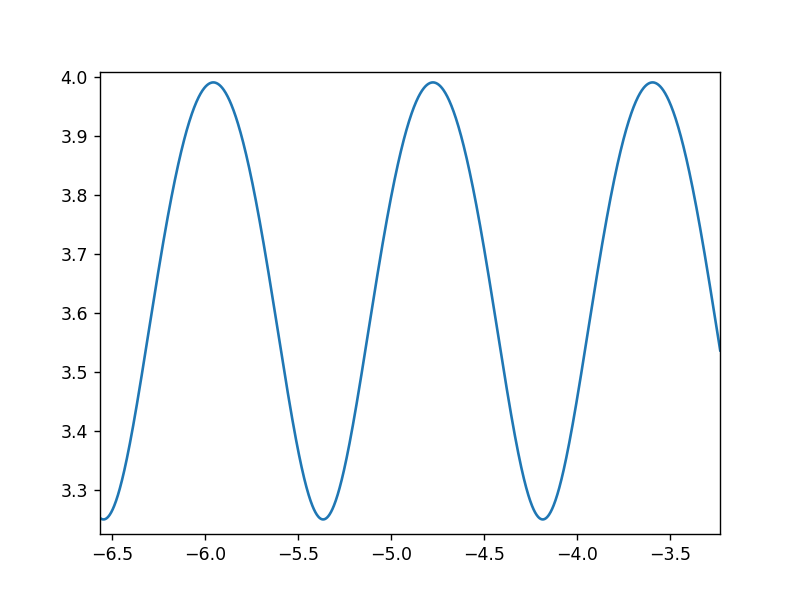

In [76]:
plt.figure()
v1 = np.linspace(-10,10,10001)
tmp = np.pi*(v1-voffset)/vperiod
z = np.sqrt(8*ejs*ec*np.abs(np.cos(tmp))*np.sqrt(1+d**2*np.tan(tmp)**2))-ec
plt.plot(v1,z)

In [306]:
np.shape(value[0][1])

(201,)

In [303]:
bit = [q1,q2,q3,q4,q5,q6,q7]
for i, j in enumerate(bit):
    globals()['q%d'%(i+1)] = j._replace(specfunc=specfunc['q%d'%(i+1)])

<IPython.core.display.Javascript object>


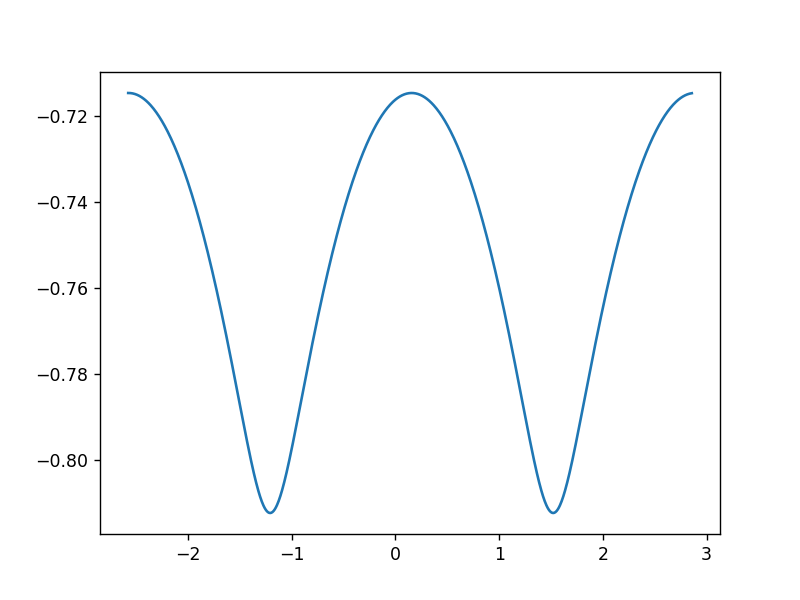

In [361]:
q = q2
func = q.specfunc
y = sy.lambdify(x,func,'numpy')
current = np.linspace(-q.T_bias[0],q.T_bias[0],1001) + q.T_bias[1] 
plt.figure()
plt.plot(current,y(current))
plt.show()

In [359]:
q2.specfunc

0.206343969938231*(0.0771313758211651*tan(1.15120887554679*x - 0.1795885845853)**2 + 1)**(1/4)*sqrt(Abs(cos(1.15120887554679*x - 0.1795885845853))) - 0.921039636712871

# 拟合调制曲线找周期

In [287]:
n = 10
Tlist = {}
matrix_cross = np.eye(n) #收集crosstalk矩阵元
matrix_phi = np.eye(n)
specfunc = {}
x = sy.Symbol('x',real=True)

<IPython.core.display.Javascript object>


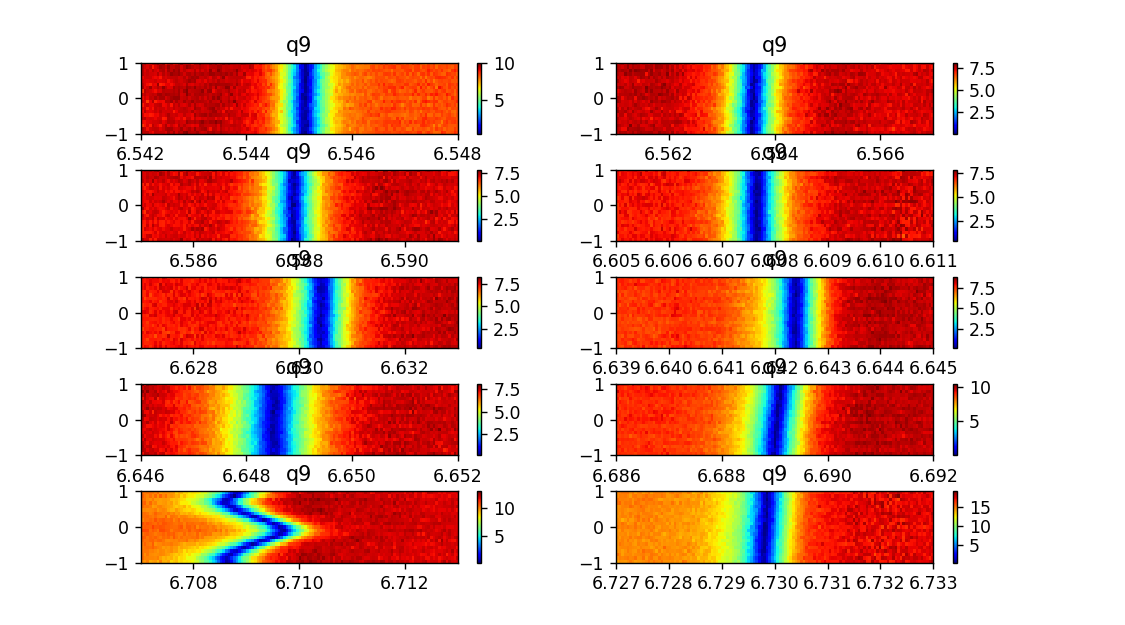

['q9'] 2020-09-23 22:50:01.536820


In [173]:
value,num,tags,finishtime = write(height=1,title='S21vsFlux_awgoffset',which=1,peak=1000) #S21vsFlux_awgoffset
print(tags,finishtime)

In [344]:
tags = ['q6']

In [81]:
def moving_average(interval, window_size):
    window = np.ones(int(window_size)) / float(window_size)
    return np.convolve(interval, window, 'same')  # numpy的卷积函数

In [351]:
def fit_spec():
    n_target = eval(tags[0][1:])
    volt, freq, s = value[n_target-1]
    volt, s = volt[0:], -np.abs(s[0:,:])
    peak = (np.max(s)+np.min(s)) / 2
    f,v,voffset, vperiod, ejs, ec, d, g, fc = op.Cavitymodulation_Fit(peak=peak).fitCavitymodulation(volt,freq,s,classify=False)
    print('voffset, vperiod, ejs, ec, d, g, fc',voffset, vperiod, ejs, ec, d, g, fc)
    v1 = np.linspace(min(v),max(v),1001)
    tmp = np.pi*(v1-voffset)/vperiod
    f01 = np.sqrt(8*ejs*ec*np.abs(np.cos(tmp))*np.sqrt(1+d**2*np.tan(tmp)**2))-ec
    z = (fc+f01+np.sqrt(4*g**2+(f01-fc)**2))/2
    voffset = op.RowToRipe().firstMax(v1,z,num=0,peakpercent=0.9,insitu=True)
    print(voffset)
#     globals()[f'q{n_target}'].T_bias.append((vperiod, voffset))
    tmp_s = np.pi*(x-voffset)/vperiod
    y01 = sy.sqrt(8*ejs*ec*sy.Abs(sy.cos(tmp_s))*sy.sqrt(1+d**2*sy.tan(tmp_s)**2))-ec
    y = (fc+y01+sy.sqrt(4*g**2+(y01-fc)**2))/2
    specfunc[tags[0]] = y
    globals()[f'q{n_target}'].specfunc = y01
    globals()[f'q{n_target}'].specfunc_cavity = y
    fig = plt.gcf() 
    axes = plt.getp(fig,'axes')
    axes[n_target-1].plot(f,v,'w.')
    axes[n_target-1].plot(z,v1,'-k')
#     Tlist[tags[0]] = [round(np.abs(vperiod),3),voffset]
    axes[n_target-1].set_title(r'$ q%d,T = %g$' %(n_target,vperiod))
fit_spec()
print(specfunc)

[0.2, 3.0338817483461415, 10.179200625, 0.6730050000000001, 0, 0.6730050000000001, 6.72933064516129]
voffset, vperiod, ejs, ec, d, g, fc -0.5547801515288897 0.2140655955464721 0.4474212108693304 0.13824880484425195 1.4188175663431737 0.5849400080031142 6.673158440562142
-0.024
{'q10': sqrt((0.703451193273011*(2.01304328656397*tan(14.6758410456844*x + 0.352220185096426)**2 + 1)**(1/4)*sqrt(Abs(cos(14.6758410456844*x + 0.352220185096426))) - 6.81140724540639)**2 + 1.36861925185073)/2 + 0.351725596636506*(2.01304328656397*tan(14.6758410456844*x + 0.352220185096426)**2 + 1)**(1/4)*sqrt(Abs(cos(14.6758410456844*x + 0.352220185096426))) + 3.26745481785895, 'q9': sqrt((1.5973401693829*(0.91580251930948*tan(1.19363906036943*x + 0.171884024693199)**2 + 1)**(1/4)*sqrt(Abs(cos(1.19363906036943*x + 0.171884024693199))) - 7.20717310263305)**2 + 4.28846062143468)/2 + 0.79867008469145*(0.91580251930948*tan(1.19363906036943*x + 0.171884024693199)**2 + 1)**(1/4)*sqrt(Abs(cos(1.19363906036943*x + 0.1718

In [354]:
q2.specfunc_cavity

sqrt((0.206343969938231*(0.0771313758211651*tan(1.15120887554679*x - 0.1795885845853)**2 + 1)**(1/4)*sqrt(Abs(cos(1.15120887554679*x - 0.1795885845853))) - 7.3364689520535)**2 + 4.30472701619145)/2 + 0.103171984969116*(0.0771313758211651*tan(1.15120887554679*x - 0.1795885845853)**2 + 1)**(1/4)*sqrt(Abs(cos(1.15120887554679*x - 0.1795885845853))) + 2.74719483931388

In [223]:
@jit
def fit_cos(tag):
    mat = []
    At = 0
    for i in range(len(value)):
        volt, freq, s = value[i]
        volt, s = volt[2:-2], s[2:-2,:]
        x, y = op.RowToRipe().manipulation(volt,freq,s)
#         y = moving_average(y,5)
#         x, y = x[3:-3], y[3:-3]
        A, C, W, phi = op.Cos_Fit().fitCos(x,y)
        T = 1 / W
        fig = plt.gcf() 
        axes = plt.getp(fig,'axes')
        axes[i].plot(y,x,'ro')
        x1 = np.linspace(min(volt),max(volt),1001)
        y1 = A*np.cos(2*np.pi/T*x1+phi)
        axes[i].plot(y1+C,x1,'b-')
        #if i != int(tag[2:]) - 1:
        t = symbols("t")
        z = A*sy.cos(2*np.pi/T*t+phi)+C
        z_diff = diff(z,t)
        if z_diff.evalf(subs = {t:0}) < 0:
            T *= -1
            if phi<0:
                phi *= -1
        phi = phi % (2*np.pi)
        mat.append((1/T,phi))
        if i == int(tag[2:]) - 1:
            bias0 = op.RowToRipe().firstMax(x1,y1,num=0)
            Tlist[tags[0]] = [round(np.abs(T),3),bias0]
        axes[i].set_title(r'$ q%d,T = %g,phi=%g $' %(i+1,T,phi))
    return mat
        

In [240]:
n_target = eval(tags[0][1:])
mat = fit_cos(tag='q_%d'%n_target)
# matrix_cross[:7,n_target-1] = np.array(mat)[:,0]
# matrix_phi[:7,n_target-1] = np.array(mat)[:,1]
Tlist

{'q10': [3.029, 0.281],
 'q9': [2.639, -0.151],
 'q8': [3.104, -0.317],
 'q7': [2.643, 0.166],
 'q6': [3.045, -0.036],
 'q5': [2.666, 0.156],
 'q4': [2.706, 0.146],
 'q3': [2.704, 0.125],
 'q2': [2.717, 0.14],
 'q1': [3.364, -0.229]}

In [280]:
Tlist = {'q10': [3.029, 0.281],
 'q9': [2.639, -0.151],
 'q8': [3.104, -0.317],
 'q7': [2.643, 0.166],
 'q6': [3.045, -0.036],
 'q5': [2.666, 0.156],
 'q4': [2.706, 0.146],
 'q3': [2.704, 0.125],
 'q2': [2.717, 0.14],
 'q1': [3.364, -0.229]}

In [281]:
for i in range(10):
    globals()[f'q{i+1}'].T_bias = Tlist[f'q{i+1}']

In [318]:
q1.T_bias 

[3.364, -0.229, (3.36212491877869, -0.24)]

In [187]:
matrix_cross[3,n_target-1] = -1/60
# matrix_phi[0,n_target-1] = 0
matrix_cross

array([[ 0.        ,  0.        ,  0.        ,  0.        , -0.01886792,
        -0.04048476, -0.04381544,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        , -0.01646792,
        -0.04206386, -0.04478635,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        , -0.01666667,
        -0.03207076, -0.04327996,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        , -0.01666667,
        -0.03083636, -0.04220373,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.55179184,
        -0.02814003, -0.03893577,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.02317556,
        -0.56072143, -0.04623969,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.01855807,
         0.01428571, -0.55296654,  0.        

In [229]:
# I0 = -np.mat(matrix_cross).I*np.mat(matrix_phi).mean(axis=1)/2/const.pi
# mat_crosstalk = np.mat([matrix_cross[:,i]/matrix_cross[i,i] if matrix_cross[i][i]!=0 else matrix_cross[i,i]\
#                  for i in range(len(matrix_cross))])
#最终加在qubits上的电流为I = mat_crosstalk.I*[0,0,0,0,1]+I0
save('crosstalk_cali','q1-q7',mat=mat_crosstalk)

In [240]:
for i in range(10):
    if matrix_cross[i][i]!=0:
        mat_crosstalk[:,i] = matrix_cross[:,i]/matrix_cross[i,i] 
    mat_crosstalk[i,i] = 1
    
save('crosstalk_cali','q1-q7',mat=mat_crosstalk)

WindowsPath('D:/QuLabData/2020/0624/crosstalk_cali/q1-q7_20200624171927.npz')

In [241]:
mat_crosstalk

array([[ 1.        ,  0.        ,  0.02081242, -0.00556228, -0.03419392,
         0.0722012 ,  0.07923705,  0.        ,  0.        ,  0.        ],
       [-0.11087751,  1.        ,  0.00911005, -0.03760278, -0.02984445,
         0.07501739,  0.08099287,  0.        ,  0.        ,  0.        ],
       [-0.09237872,  0.        ,  1.        , -0.02808258, -0.03020463,
         0.05719553,  0.07826868,  0.        ,  0.        ,  0.        ],
       [-0.09966487,  0.        ,  0.08454681,  1.        , -0.03020463,
         0.05499408,  0.0763224 ,  0.        ,  0.        ,  0.        ],
       [-0.07804834,  0.        ,  0.07193357, -0.06137783,  1.        ,
         0.0501854 ,  0.07041253,  0.        ,  0.        ,  0.        ],
       [-0.08190848,  0.        ,  0.10309907, -0.06923761,  0.04200055,
         1.        ,  0.08362114,  0.        ,  0.        ,  0.        ],
       [-0.06118311,  0.        ,  0.07212722, -0.06237858,  0.03363237,
        -0.02547738,  1.        ,  0.        

In [100]:
bit = [q1,q3,q6,q8,q10]
for i, j in enumerate(bit,start=0):
    globals()['q%d'%(i+1)] = j._replace(T_bias=Tlist['q%d'%(i+1)])

KeyError: 'q2'

In [261]:
Tlist

{'q10': [3.029, 0.281],
 'q9': [2.639, -0.151],
 'q8': [3.104, -0.317],
 'q7': [2.643, 0.166],
 'q6': [3.045, -0.036],
 'q5': [2.666, 0.156],
 'q4': [2.706, 0.146],
 'q3': [2.704, 0.125],
 'q2': [2.717, 0.14],
 'q1': [3.364, -0.229, (-0.109617174519554, 3.302254481019204)]}

In [105]:
q8 = q8._replace(T_bias=[1.844, 0.556])

# 拟合T1

<IPython.core.display.Javascript object>


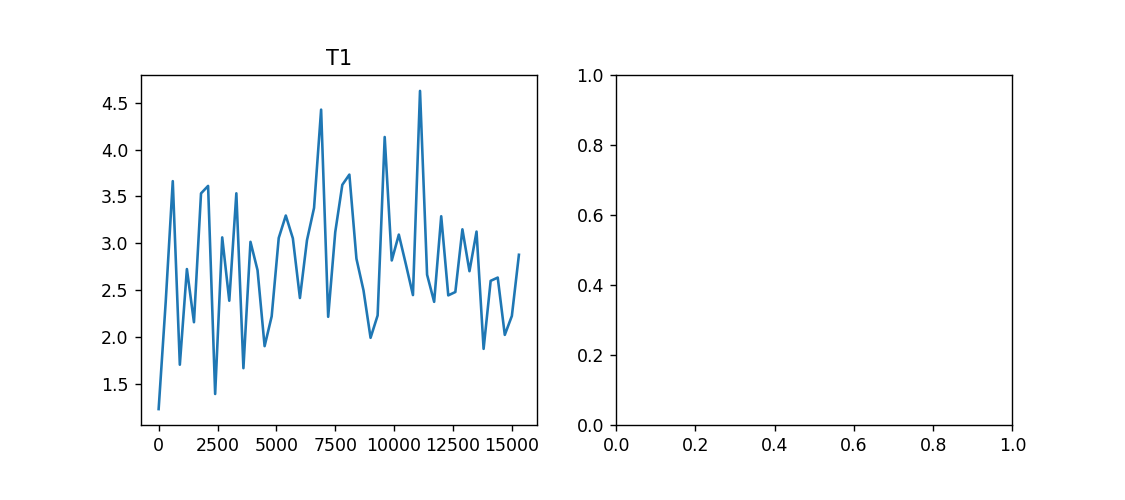

['q1'] 2020-09-14 23:31:31.704727


In [28]:
value,num,tags, finishtime = write(height=4,title='T1',which=0)
print(tags,finishtime)

In [357]:
tag = ''
for i in tags:
    tag += i
save('T1',tag,base_path=r'D:\skzhao\data\ffsu\Nb10bits_2_cuqiang',row=value[0][0],col=value[0][1])

WindowsPath('D:/skzhao/data/ffsu/Nb10bits_2_cuqiang/2020/0824/T1/q6_20200824172031.npz')

In [75]:
x, y = value[0][0], value[0][1]
A, B, T1 = op.Exp_Fit().fitExp(x,np.abs(y))
z = A * np.exp(-x*T1) + B
fig = plt.gcf()
ax = plt.getp(fig,'axes')
ax[0].plot(x,z)
ax[0].set_title('$T_{1}=%.2fus$'%(1/T1/1e3))
ax[i].set_xlabel('time / ns')
ax[i].set_ylabel('Voltage / a.u.')
plt.show()

In [218]:
10**4.6

39810.71705534969

# 二维T1

<IPython.core.display.Javascript object>


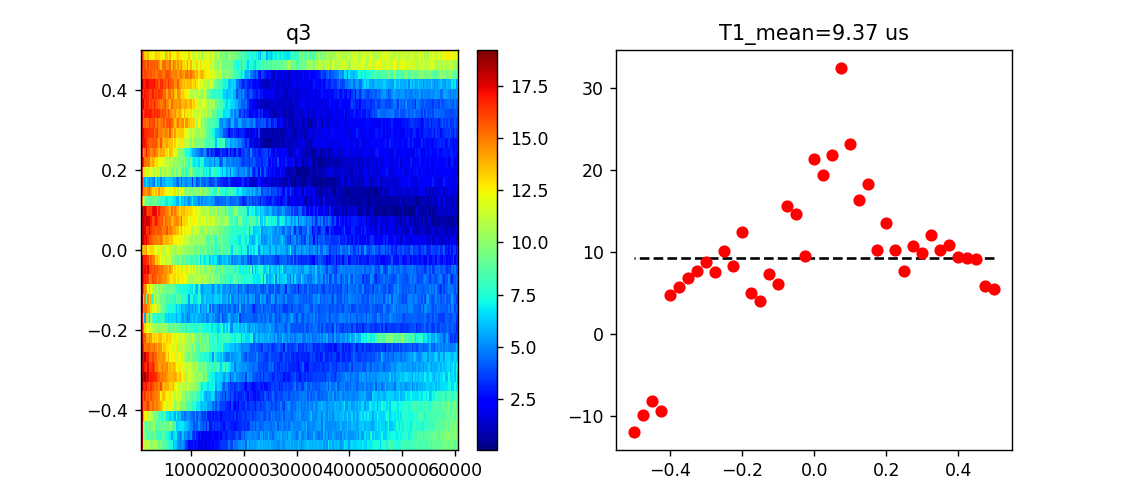

['q3'] 2020-09-11 19:07:00.468937


In [77]:
value,num,tags, finishtime = write(height=4,title='vRabi',which=1)
print(tags,finishtime)

In [78]:
x, y, s = value[0][0],value[0][1], value[0][2]
t1 = []
for i in range(len(x)):
    A, B, T1 = op.Exp_Fit().fitExp(y,np.abs(s[i]))
    t1.append(round(1/T1/1e3,2))
fig = plt.gcf()
ax = plt.getp(fig,'axes')
ax[1].plot(x,t1,'ro')
ax[1].hlines(np.mean(t1),np.max(x),np.min(x),'k','--')
ax[1].set_title('T1_mean=%.2f us'%np.mean(t1))
plt.show()

# 拟合Rabi

<IPython.core.display.Javascript object>


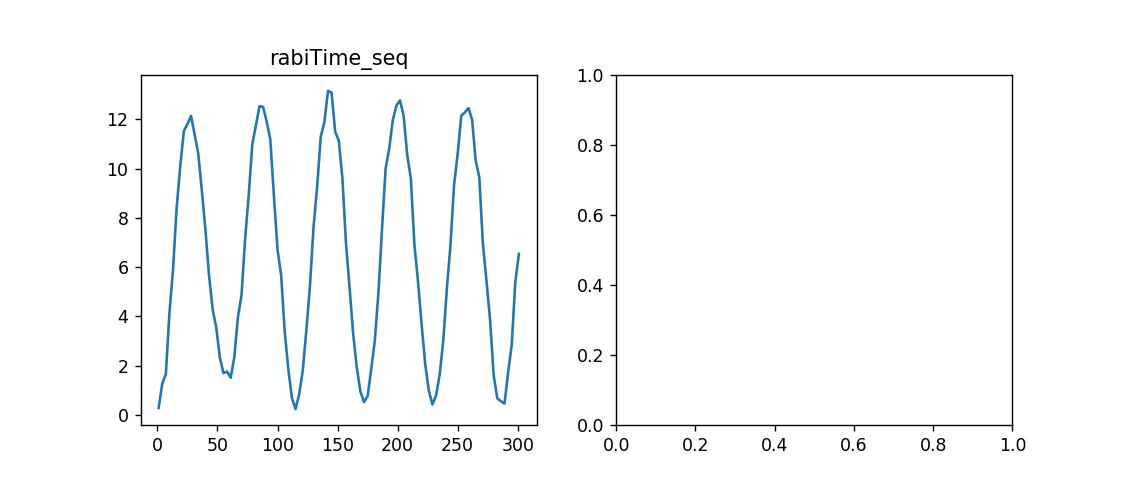

['q4'] 2020-09-25 04:36:13.735278


In [259]:
value,num,tags,finishtime = write(height=4,title='rabiTime_seq',which=2)
print(tags,finishtime)

In [252]:
fig = plt.gcf()
ax = plt.getp(fig,'axes')
for i in range(num):
    x, y  = value[i][0], value[i][1]
    A,B,T1,w,phi,out = op.Rabi_Fit(envelopemethod='hilbert',phi=0,T1=100000).fitRabi(np.abs(x),np.abs(y))
    z = A*np.exp(-x/T1)*np.cos(2*np.pi*w*x+phi) + B
#     env = out[0]*np.exp(-x/out[2]) + out[1]
    env = A*np.exp(-x/T1) + B
    sample = (np.max(x) - np.min(x))/(len(x) - 1)
    yt  = np.fft.fftshift(np.fft.fftfreq(len(y))) / sample
    amp = np.fft.fftshift(np.fft.fft(y))
    ax[i].plot(x,z)
#     ax[i].plot(x,out[3])
    ax[i].plot(x,env)
    ax[i].set_title('$T_{1}=%fns,period=%fns$'%(T1,1/w/2))
    ax[i].set_xlabel('time / ns')
    ax[i].set_ylabel('Voltage / a.u.')
    ax[1].plot(yt[yt!=0],np.abs(amp[yt!=0]))
    ax[1].set_title('$W=%.3f$'%(np.abs(yt[yt!=0][np.argmax(np.abs(amp[yt!=0]))])))
plt.show()

(8.604338541072794, 8.275891426496122, 100000, 0.013201320132013201, 0)


In [347]:
tag = ''
for i in tags:
    tag += i
save('Rabi',tag,base_path=r'D:\skzhao\data\ffsu\Nb10bits_2_cuqiang',row=value[0][0],col=value[0][1])

WindowsPath('D:/skzhao/data/ffsu/Nb10bits_2_cuqiang/2020/0824/Rabi/q6_20200824171712.npz')

# 拟合Ramsey及SpinEcho

<IPython.core.display.Javascript object>


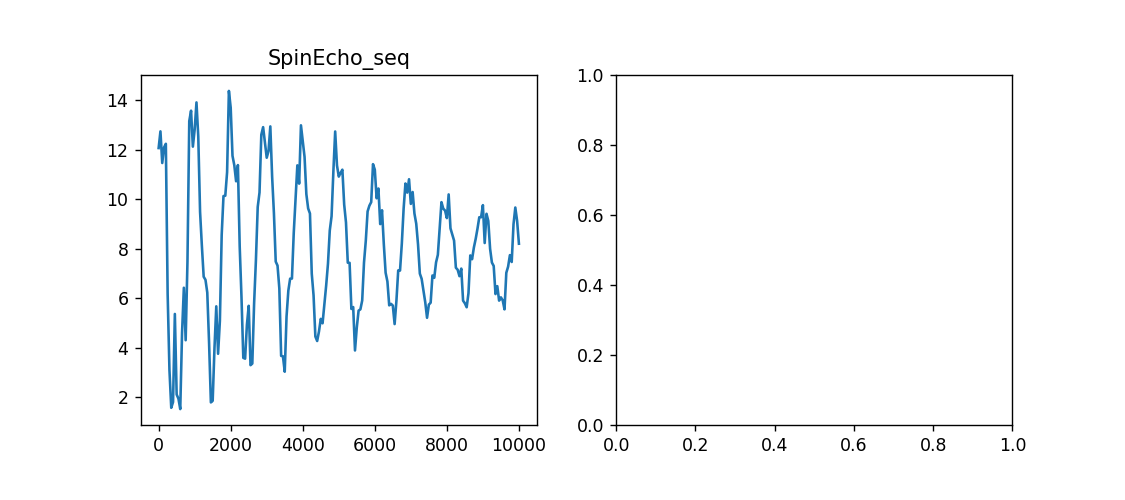

['q1'] 2020-09-23 19:02:42.404827


In [121]:
value,num,tags,finishtime = write(height=4,title='SpinEcho_seq',which=0)
print(tags,finishtime)

<IPython.core.display.Javascript object>


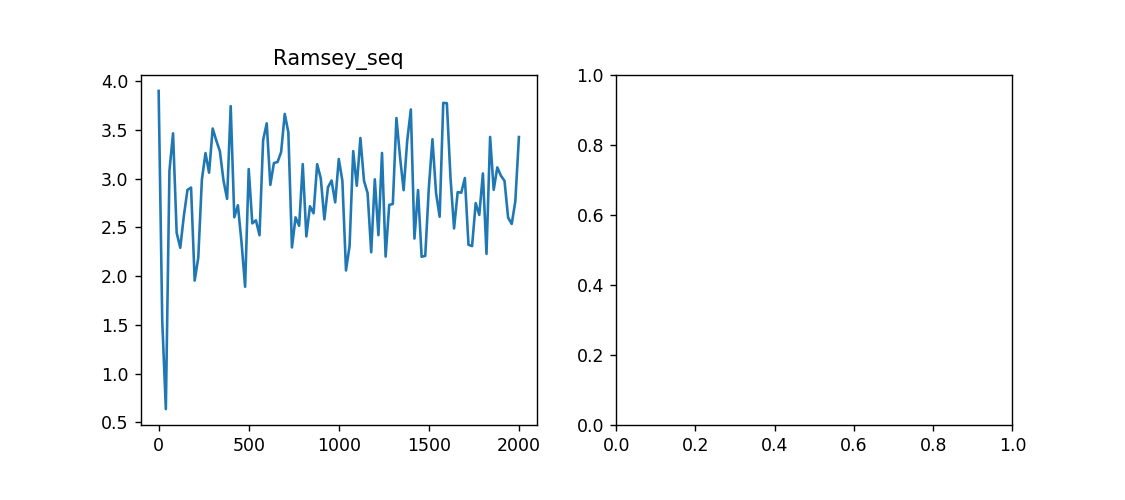

['q1'] 2020-09-14 23:28:49.560710


In [274]:
value,num,tags,finishtime = write(height=4,title='Ramsey_seq',which=7)
print(tags,finishtime)

In [351]:
tag = ''
for i in tags:
    tag += i
save('SpinEcho',tag,base_path=r'D:\skzhao\data\ffsu\Nb10bits_2_cuqiang',row=value[0][0],col=value[0][1])

WindowsPath('D:/skzhao/data/ffsu/Nb10bits_2_cuqiang/2020/0824/SpinEcho/q6_20200824171804.npz')

In [195]:
fig = plt.gcf()
ax = plt.getp(fig,'axes')
for i in range(num):
    x, y  = value[i][0], value[i][1]
    sample = (np.max(x) - np.min(x))/(len(x) - 1)
    yt  = np.fft.fftshift(np.fft.fftfreq(len(y))) / sample
    amp = np.fft.fftshift(np.fft.fft(y))
    A,B,T1,T2,w,phi,out = op.T2_Fit(T1=10000,funcname='gauss',envelopemethod='hilbert').fitT2(x,np.abs(y))
    z = A*np.exp(-(x/T2)**2-x/T1/2)*np.cos(2*np.pi*w*x+phi) + B
    z_env = A*np.exp(-(x/T2)**2-x/T1/2) + B
    env = out[0]*np.exp(-(x/out[3])**2-x/out[2]/2)+out[1]
    ax[i].plot(x,z)
    ax[i].plot(x,z_env)
#     ax[i].plot(x,out[-1])
    #ax[i].set_title('$T_{1}=%f,T_{2}=%f,w=%f$'%(T1,T2,w*1e3))
    ax[i].set_title('$T_{2}^{*}=%.2fns,\omega=%.2fMHz$'%(T2,w*1e3))
    ax[1].plot(yt[yt!=0],np.abs(amp[yt!=0]))
    ax[i].set_xlabel('time / ns')
    ax[i].set_ylabel('Voltage / a.u.')
plt.show()

(34.91981229548298, -42.55621409044663, 10000, 1387.5, 0.0029702970297029703, 0)


## 指数拟合

In [162]:
fig = plt.gcf()
ax = plt.getp(fig,'axes')
for i in range(num):
    x, y  = value[i][0], value[i][1]
    A,B,T1,w,phi,out = op.Rabi_Fit(envelopemethod='hilbert',phi=0).fitRabi(np.abs(x),np.abs(y))
    z = A*np.exp(-x/T1)*np.cos(2*np.pi*w*x+phi) + B
#     env = out[0]*np.exp(-x/out[2]) + out[1]
    env = A*np.exp(-x/T1) + B
    sample = (np.max(x) - np.min(x))/(len(x) - 1)
    yt  = np.fft.fftshift(np.fft.fftfreq(len(y))) / sample
    amp = np.fft.fftshift(np.fft.fft(y))
    ax[i].plot(x,z)
#     ax[i].plot(x,out[3])
    ax[i].plot(x,env)
    ax[i].set_title('$exp-fit,T_{2}=%.2fns$'%T1)
    ax[i].set_xlabel('time / ns')
    ax[i].set_ylabel('Voltage / a.u.')
    ax[1].plot(yt[yt!=0],np.abs(amp[yt!=0]))
    ax[1].set_title('$W=%.3f$'%(np.abs(yt[yt!=0][np.argmax(np.abs(amp[yt!=0]))])))
plt.show()

(37.30802970231167, 43.44680974096844, 20000, 0.0027722772277227726, 0)


In [248]:
1/(1/4.75-1/16)

6.755555555555556

# ramseyZpulse

<IPython.core.display.Javascript object>


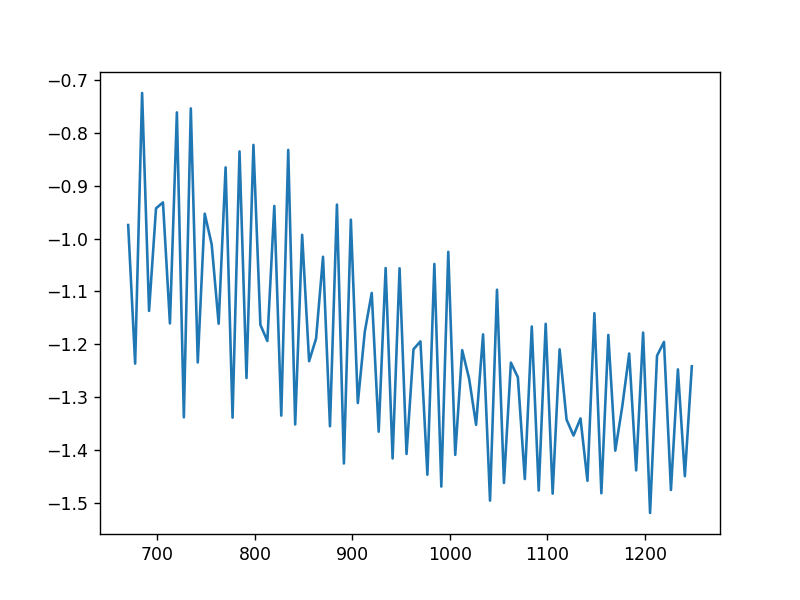

In [94]:
data, ID, comment, tags, name = read(title='ramseyZpulse',which=0)
x, y = data[0], data[1]
coordinate = [[1-2*j[i] for i in range(2)] for j in y]
theta = np.array([np.arctan(i[1]/i[0]) for i in coordinate])
plt.figure()
plt.plot(x[:,0],-theta)
plt.show()

# AC_Stark

<IPython.core.display.Javascript object>


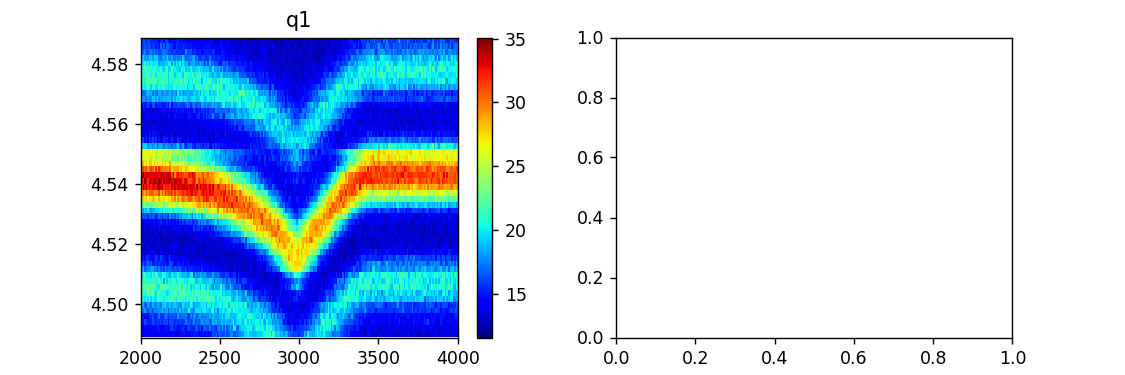

['q1'] 2020-09-13 23:36:25.229126


In [90]:
value,num,tags,finishtime = write(height=3,title='acStark',which=0,peak=300)
print(tags,finishtime)

In [107]:
async def exMixing(f):
    qname = [i for i in f]
    f_ex = np.array([f[i] for i in f])
    ex_lo = f_ex.mean() + 50e6
    delta =  ex_lo - f_ex
    delta_ex = {qname[i]:delta[i] for i in range(len(qname))}
    # n = len(f_ex)
    return ex_lo, delta_ex

In [109]:
f_ex1, f_ex2 = {'f1':4e9},{'f2':3e9}
ex_lo1, delta_ex1 = await exMixing(f_ex1)
ex_lo2, delta_ex2 = await exMixing(f_ex2)

In [113]:
{**delta_ex1,**delta_ex2}

{'f1': 50000000.0, 'f2': 50000000.0}

<IPython.core.display.Javascript object>


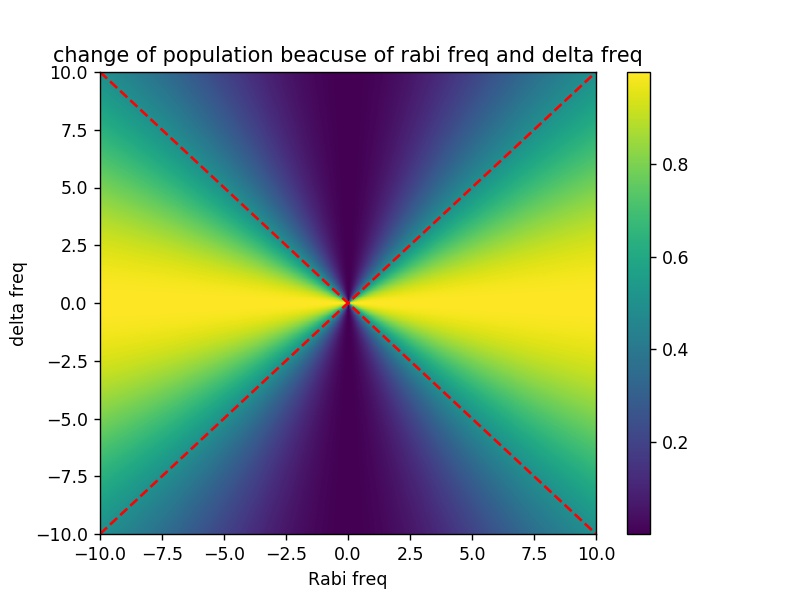

In [722]:
x = np.linspace(-10,10,1000)
z = np.linspace(-10,10,1000)
y = [x**2/(x**2+i**2) for i in z]
plt.figure()
plt.imshow(y,aspect='auto',origin='lower',extent=[min(x),max(x),min(z),max(z)])
plt.plot([-10,10],[-10,10],'r--')
plt.plot([-10,10],[10,-10],'r--')
plt.xlabel('Rabi freq')
plt.ylabel('delta freq')
plt.title('change of population beacuse of rabi freq and delta freq')
plt.colorbar()
plt.show()

In [515]:
def test(y,z=0,l=0):
    return y+z+l

In [516]:
def f(x,func,**kw):
    h = func(**kw)
    print('lala=',kw['l'])
    print(h+1)

In [518]:
f(10,test,y=1,z=2,l=11)

TypeError: f() takes 2 positional arguments but 3 were given

In [489]:
def f(l=[]):
    l.append(1)
    return l

In [490]:
f(l=['qq1'])

['qq1', 1]

In [491]:
f(l=['q2'])

['q2', 1]

In [492]:
f()

[1]

In [519]:
x = np.arange(0,1,0.01)

In [523]:
isinstance(x,np.ndarray)

True

In [533]:
f1, f2 = {}, {}

In [534]:
f2['q1'] = 1

In [535]:
f1

{}

In [25]:
def predistort(waveform, sRate, zCali):
    """Predistort input waveform.
    Parameters
    ----------
        waveform : complex numpy array
            Waveform data to be pre-distorted
        zCali: [2.55e-9, -28e-3, 8.02e-9, -28e-3, 101.5e-9, -14.5e-3,369.7e-9,-6.2e-3]
    Returns
    -------
    waveform : complex numpy array
        Pre-distorted waveform
    """
    dt = 1 / sRate
    wf_size = len(waveform)
    tau1, A1, tau2, A2, tau3, A3, tau4, A4, tau5, A5 = zCali
    print('tau:', tau1, A1, tau2, A2, tau3, A3, tau4, A4, tau5, A5)
    # pad with zeros at end to make sure response has time to go to zero
    # pad_time = 6 * max([tau1, tau2, tau3])
    pad_time = 4e-6  # 这里默认改为增加4us的pad，返回时舍去1us，保留3us拖尾
    pad_size = round(pad_time / dt)
    pad_size_2 = round(3e-6 / dt)  # 保留的点数
    padded_zero = np.zeros(pad_size)
    padded = np.append(waveform,padded_zero)

    Y = np.fft.rfft(padded, norm='ortho')

    omega = 2 * np.pi * np.fft.rfftfreq(wf_size+pad_size, dt)
    H = (1 + (1j * A1 * omega * tau1) / (1j * omega * tau1 + 1) +
         (1j * A2 * omega * tau2) / (1j * omega * tau2 + 1) +
         (1j * A3 * omega * tau3) / (1j * omega * tau3 + 1) +
         (1j * A4 * omega * tau4) / (1j * omega * tau4 + 1)+
         (1j * A5 * omega * tau5) / (1j * omega * tau5 + 1))

    Yc = Y / H
    yc = np.fft.irfft(Yc, norm='ortho')
    # return yc[:wf_size]
    #这里返回增加了3us拖尾的序列
    return yc[:(wf_size+pad_size_2)]

In [1757]:
250000-7500

242500

tau: 2.55e-09 -0.028 8.02e-09 -0.028 1.015e-07 -0.0145 3.697e-07 -0.0062 5e-09 -0.005


<IPython.core.display.Javascript object>


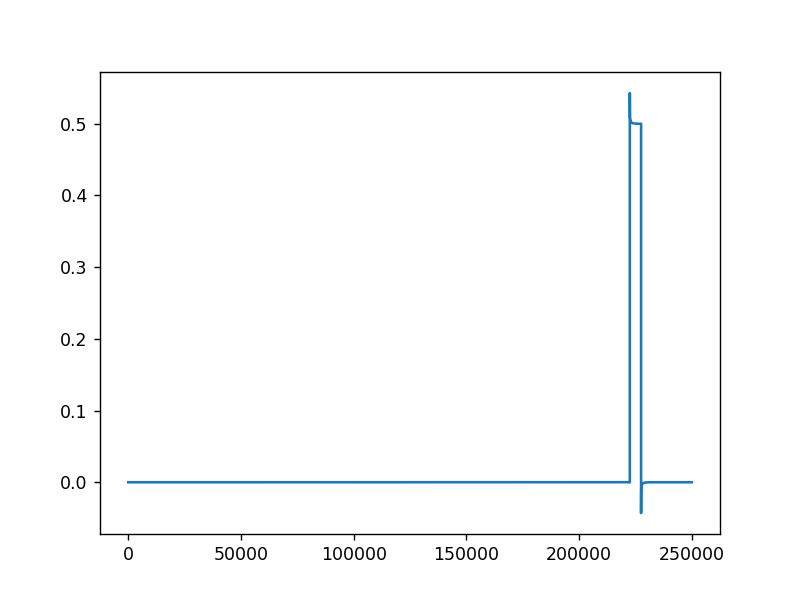

In [39]:
t = np.linspace(-90000,7000,242500)*1e-9
w = wn.square(2000e-9)*0.5
wave = w(t)
I = predistort(wave,2.5e9,[2.55e-9, -28e-3, 8.02e-9, -28e-3, 101.5e-9, -14.5e-3,369.7e-9,-6.2e-3,5e-9,-5e-3])
plt.figure()
plt.plot(I)
plt.show()

In [34]:
len(np.array((np.arange(10),))+np.array((np.arange(10),)))

1

In [16]:
z_new = a*b*np.exp(b*x) + c*d*np.exp(d*x) 
# z_new = z_new/np.max(np.abs(z_new))
# x = Twoexp(para,t)
def hfunc(x):
    global z_new
#     y = (a*b*np.exp(b*x) + c*d*np.exp(d*x))/np.max(np.abs(a*b*np.exp(b*x) + c*d*np.exp(d*x)))
    
    H = np.fft.fft(z_new) + 1/2/np.pi
    h = np.fft.ifft(H)
    return h, H

In [17]:
t = np.linspace(-90000,10000,250000)
w = wn.square(5000)
wave = w(t)
h, H = hfunc(t)
wave_cali = np.convolve(wave,h,'same')

In [1696]:
h, H = hfunc(t)
wave_cali = np.fft.irfft(np.fft.rfft(wave)/H)

C:\WPy64-3740\python-3.7.4.amd64\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


<IPython.core.display.Javascript object>


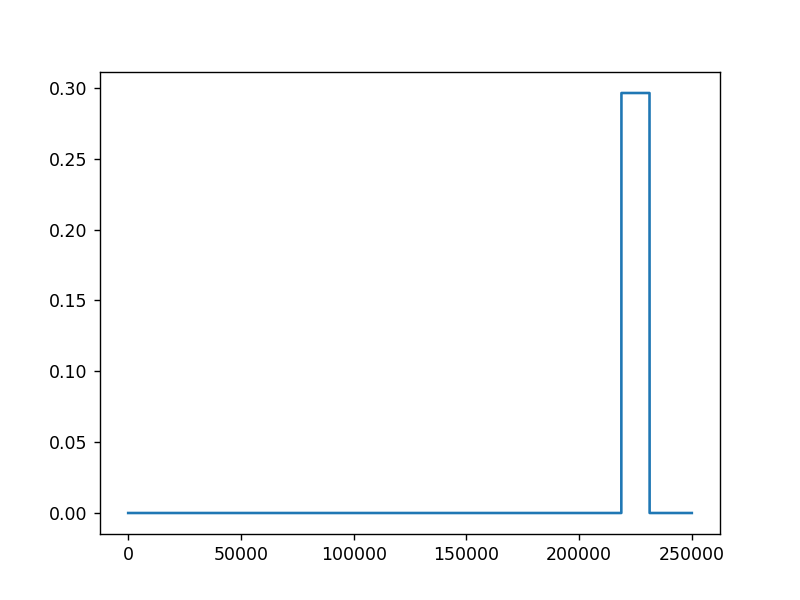

In [19]:
plt.figure()
plt.plot(np.abs(wave_cali))
plt.show()

In [82]:
# help(np.convolve)

# 处理html文件

In [484]:
from qulab import getplotlydat
gpd = imp.reload(getplotlydat)

In [469]:
htmlfile = open(r'D:\step1\14Q1changePwr.html', 'r', encoding='utf-8')
htmlhandle = htmlfile.read()

In [470]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(htmlhandle, 'lxml')

In [485]:
path = r'D:\step1\14Q1changePwr.html'
x, y, z = gpd.gethtmldata(path,flag='x'), gpd.gethtmldata(path,flag='y'), gpd.gethtmldata(path,flag='z')

In [493]:
z

array([[0.25921025, 0.2589861 , 0.25909383, ..., 0.2533441 , 0.25334662,
        0.25340373],
       [0.25950217, 0.25931113, 0.25550537, ..., 0.25340873, 0.25333372,
        0.25326414],
       [0.25958915, 0.25932828, 0.25928068, ..., 0.25320511, 0.25345128,
        0.2534569 ],
       ...,
       [0.25974786, 0.25973037, 0.26020824, ..., 0.25340719, 0.25254082,
        0.2534899 ],
       [0.25935685, 0.25878079, 0.25919945, ..., 0.25312764, 0.25421194,
        0.25381986],
       [0.26031712, 0.26065906, 0.25937801, ..., 0.25353294, 0.25337955,
        0.25378972]])

<IPython.core.display.Javascript object>


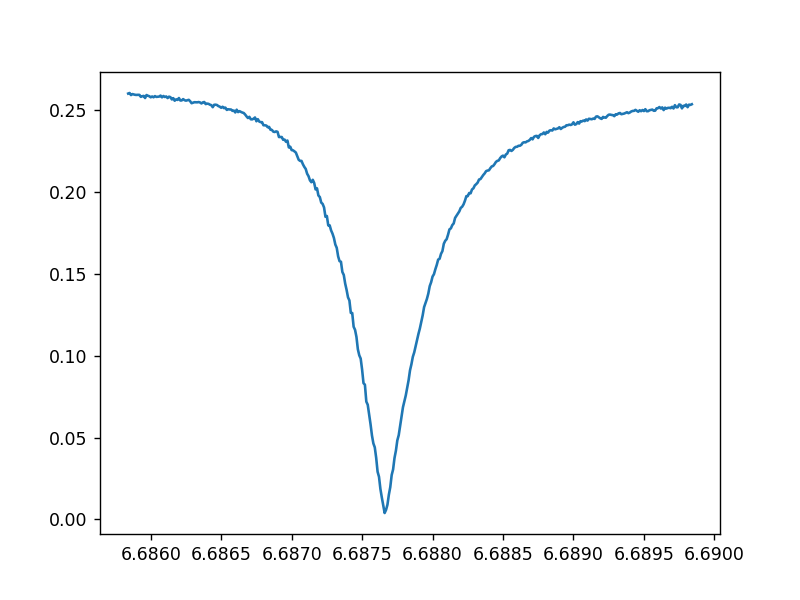

In [492]:
plt.figure()
plt.plot(x[0,:],z[-1])
plt.show()

In [461]:
gpd.initfile(path)[4]-gpd.initfile(path)[3]

422702

In [266]:
data = soup.find('div',{'class':"plotly-graph-div"})
data

<div class="plotly-graph-div" id="9a8d02f7-44bb-4595-8eb9-130b36381b22" style="height:100%; width:100%;"></div>

In [267]:
# help(data)

In [471]:
soup

<html>
<head><meta charset="utf-8"/></head>
<body>
<div>
<script type="text/javascript">window.PlotlyConfig = {MathJaxConfig: 'local'};</script>
<script type="text/javascript">/**
* plotly.js v1.48.1
* Copyright 2012-2019, Plotly, Inc.
* All rights reserved.
* Licensed under the MIT license
*/
!function(t){if("object"==typeof exports&&"undefined"!=typeof module)module.exports=t();else if("function"==typeof define&&define.amd)define([],t);else{("undefined"!=typeof window?window:"undefined"!=typeof global?global:"undefined"!=typeof self?self:this).Plotly=t()}}(function(){return function(){return function t(e,r,n){function i(o,s){if(!r[o]){if(!e[o]){var l="function"==typeof require&&require;if(!s&&l)return l(o,!0);if(a)return a(o,!0);var c=new Error("Cannot find module '"+o+"'");throw c.code="MODULE_NOT_FOUND",c}var u=r[o]={exports:{}};e[o][0].call(u.exports,function(t){return i(e[o][1][t]||t)},u,u.exports,t,e,r,n)}return r[o].exports}for(var a="function"==typeof require&&require,o=0;o<n.

In [199]:
f0, Qi, Qe, QL, phi, f, s = op.Cavity_fit().fitCavity(f,s21)

0.0003599999999996939


In [191]:
f0, Qi, Qe, QL, phi

(6.391316859672923,
 22621.98170102801,
 9125.835246856113,
 6502.635387493445,
 0.2938967941595496)

<IPython.core.display.Javascript object>


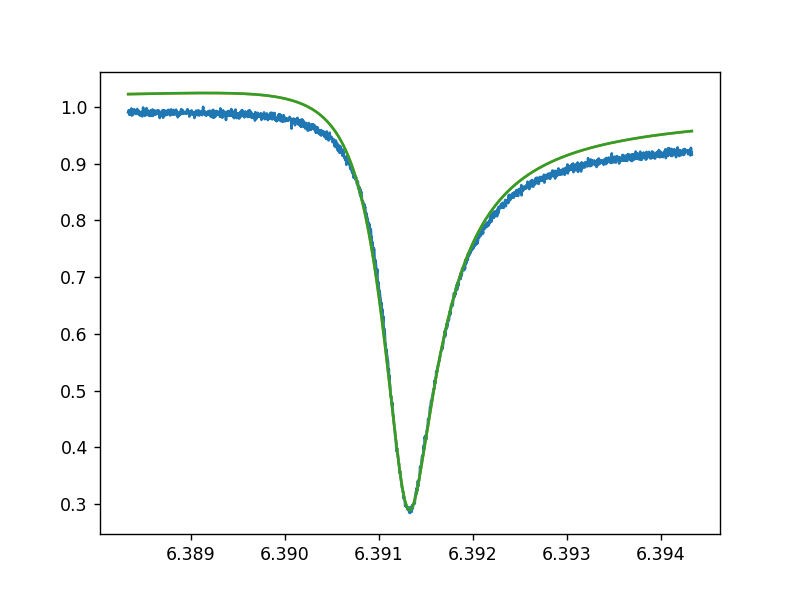

In [201]:
plt.figure()
plt.plot(f,np.abs(s))
plt.plot(f,1/np.abs(op.Cavity_fit().invS21(f, f0, Qi, Qe, phi)))
plt.show()

In [166]:
6.39176-6.39103

0.0007299999999998974

<IPython.core.display.Javascript object>


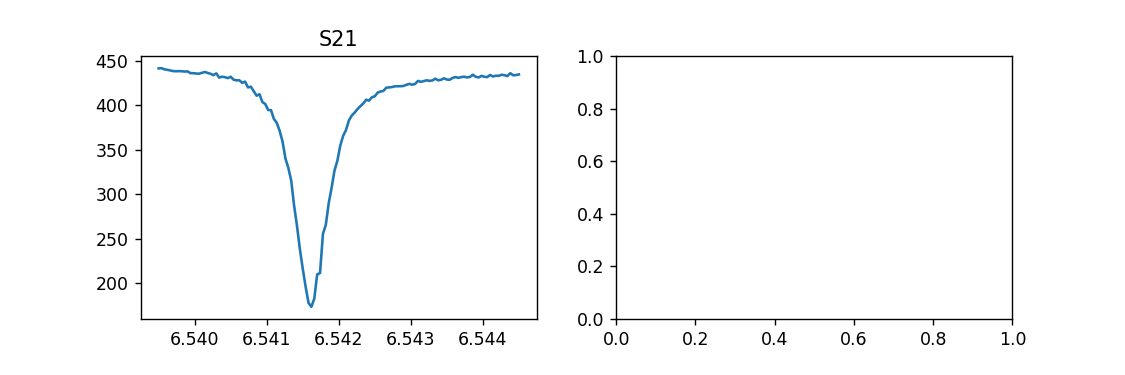

['q4'] 2020-07-12 16:31:13.371257


In [197]:
value,num,tags,finishtime = write(title='S21',height=3,which=1000,peak=11200)
print(tags,finishtime)

In [198]:
x, y = value[0][0], np.abs(value[0][1])

In [273]:
data = np.load(r'C:\Users\23967\Desktop\tozsk\192739Scanfr.npz')
x, y = data['ffrr'], np.abs(data['dataGhz'])

In [122]:
import scipy.signal as signal

In [123]:
x_new = np.linspace(min(x),max(x),1001)
z = signal.resample_poly(y,1001,126,padtype='line')

In [199]:
peaks_index= signal.find_peaks(-y,height=-300,width=0.002)
peaks_index

In [270]:
z= op.RowToRipe().smooth(y,f0=0.015)

In [274]:
index, prominences = op.RowToRipe().findPeaks(y)

<IPython.core.display.Javascript object>


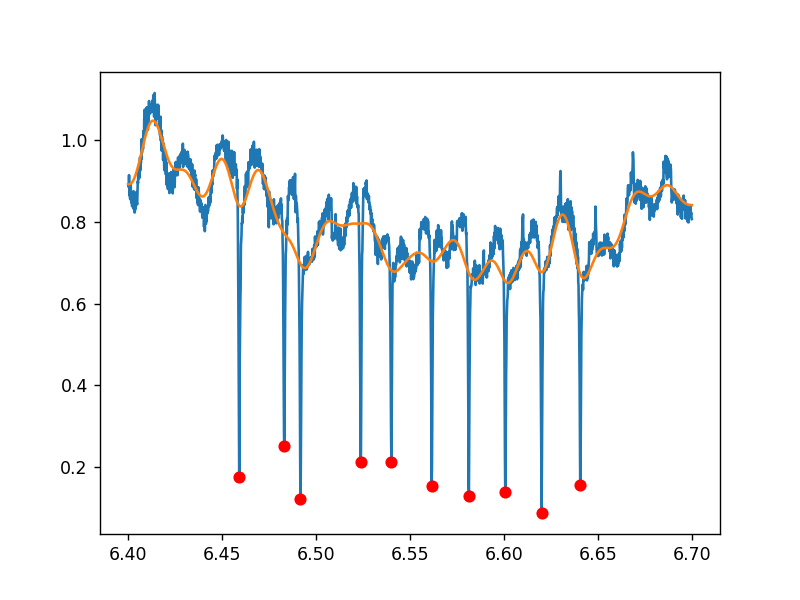

In [275]:
plt.figure()
plt.plot(x,y)
plt.plot(x,z)
plt.plot(x[index],y[index],'ro')
# plt.plot([x[46],x[60]],[y[46],y[60]])
# plt.plot([x[peaks_index[0][0]]]*2,[173.34117099,262.52528213+173.34117099])
# plt.plot(x[peaks_index[0]],y[peaks_index[0]],'ro')

In [338]:
t = np.linspace(-10,10,10001)
y = signal.chirp(t,0,10,100)

<IPython.core.display.Javascript object>


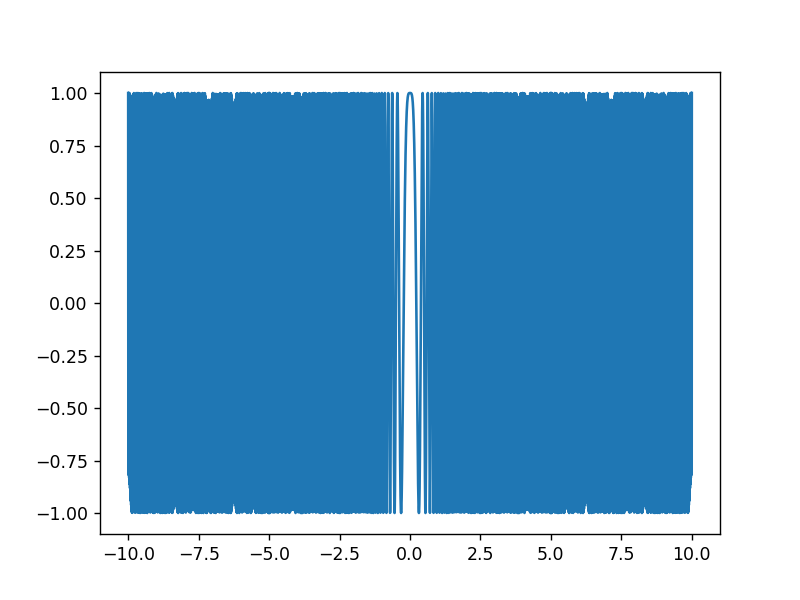

In [339]:
plt.figure()
plt.plot(t,y)
# plt.plot(x,z)

In [638]:
import inspect as insp

In [479]:
x = insp.getfullargspec(f)

In [642]:
functions_list = [o for o in insp.getmembers(op) if insp.isfunction(o[1])]

In [643]:
functions_list

[('bh',
  <function scipy.optimize._basinhopping.basinhopping(func, x0, niter=100, T=1.0, stepsize=0.5, minimizer_kwargs=None, take_step=None, accept_test=None, callback=None, interval=50, disp=False, niter_success=None, seed=None)>),
 ('curve_fit',
  <function scipy.optimize.minpack.curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=True, bounds=(-inf, inf), method=None, jac=None, **kwargs)>),
 ('ls',
  <function scipy.optimize._lsq.least_squares.least_squares(fun, x0, jac='2-point', bounds=(-inf, inf), method='trf', ftol=1e-08, xtol=1e-08, gtol=1e-08, x_scale=1.0, loss='linear', f_scale=1.0, diff_step=None, tr_solver=None, tr_options={}, jac_sparsity=None, max_nfev=None, verbose=0, args=(), kwargs={})>),
 ('pTorho', <function qulab.optimize.pTorho(plist)>)]

FullArgSpec(args=['x', 'y', 'z', 'k'], varargs='args', varkw='kw', defaults=(0, 9), kwonlyargs=[], kwonlydefaults=None, annotations={})

In [485]:
x[3]

(0, 9)

In [483]:
help(insp.getfullargspec)

Help on function getfullargspec in module inspect:

getfullargspec(func)
    Get the names and default values of a callable object's parameters.
    
    A tuple of seven things is returned:
    (args, varargs, varkw, defaults, kwonlyargs, kwonlydefaults, annotations).
    'args' is a list of the parameter names.
    'varargs' and 'varkw' are the names of the * and ** parameters or None.
    'defaults' is an n-tuple of the default values of the last n parameters.
    'kwonlyargs' is a list of keyword-only parameter names.
    'kwonlydefaults' is a dictionary mapping names from kwonlyargs to defaults.
    'annotations' is a dictionary mapping parameter names to annotations.
    
    Notable differences from inspect.signature():
      - the "self" parameter is always reported, even for bound methods
      - wrapper chains defined by __wrapped__ *not* unwrapped automatically



In [468]:
def f(**kws):
    x,y = kws['x'], kws['y']
    print(x,y)

In [572]:
from configparser import ConfigParser

In [573]:
cp = ConfigParser()
cp.read(r'D:\QuLabData\config\status.ini')

['D:\\QuLabData\\config\\status.ini']

In [645]:
cp.set('rabi','nwave','')

In [581]:
cp.add_section('Ramsey')

In [582]:
with open(r'D:\QuLabData\config\status.ini','w') as file:
    cp.write(file)

In [505]:
x = insp.getfullargspec(f)

In [506]:
x

FullArgSpec(args=['x', 'y'], varargs=None, varkw=None, defaults=(1.1,), kwonlyargs=[], kwonlydefaults=None, annotations={'x': <class 'int'>})

In [507]:
x.annotations

{'x': int}

In [510]:
type(x.defaults[0])

float

In [511]:
type(None)

NoneType

In [525]:
def f(x,y=1,z=None):
    print(x,y,z)

In [527]:
f(**{'x':1,'y':2,'z':3})

1 2 3


In [564]:
import yaml

In [569]:
with open('D:\QuLabData\config\status.yaml','r',encoding='utf-8') as ym:
    data = ym.read()

In [567]:
data = yaml.load(data,Loader=yaml.Loader)

In [570]:
data

'test: haha\n'

In [553]:
from ruamel import yaml

In [561]:
x = {'test':'haha'}
with open('D:\QuLabData\config\status.yaml','w',encoding='utf-8') as ym:
    yaml.dump(x, ym, Dumper=yaml.RoundTripDumper)

In [583]:
from pathlib import Path

In [594]:
pathnow = Path('D:\QuLabData\config') / time.strftime('%Y') / time.strftime('%m%d')
fname = f"{name}_{time.strftime('%H%M%S')}.ini"
# pathnow = pathnow / fname
pathnow.mkdir(parents=True, exist_ok=True)

In [595]:
with open(pathnow/fname,'w') as file:
    pass

In [596]:
import pymongo

In [599]:
myclient = pymongo.MongoClient('10.122.7.19',27017)
mydb = myclient["test"]
mycol = mydb["test"]

In [600]:
x = ['1','2']

In [630]:
from mongoengine import (BooleanField, ComplexDateTimeField, Document,
                         FileField, IntField, ListField, ReferenceField,
                         StringField, ObjectIdField)

In [604]:
# from qulab.storage.schema import Record

In [631]:
f = ObjectIdField(cp)

TypeError: db_field should be a string.

In [653]:
from qulab import configread
configread.updatefileattr(cw)

In [654]:
configread.updatefileattr(cw)

NameError: name 'cw' is not defined

In [231]:
import asyncio

In [232]:
loop = asyncio.get_event_loop()

In [233]:
help(loop)

Help on _WindowsSelectorEventLoop in module asyncio.windows_events object:

class _WindowsSelectorEventLoop(asyncio.selector_events.BaseSelectorEventLoop)
 |  _WindowsSelectorEventLoop(selector=None)
 |  
 |  Windows version of selector event loop.
 |  
 |  Method resolution order:
 |      _WindowsSelectorEventLoop
 |      asyncio.selector_events.BaseSelectorEventLoop
 |      asyncio.base_events.BaseEventLoop
 |      asyncio.events.AbstractEventLoop
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  run_forever(self)
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from asyncio.selector_events.BaseSelectorEventLoop:
 |  
 |  __init__(self, selector=None)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  add_reader(self, fd, callback, *args)
 |      Add a reader callback.
 |  
 |  add_writer(self, fd, callback, *args)
 |      Add a writer callback..
 |  
 |  close(self)
 |      Close the even